<a href="https://colab.research.google.com/github/shintaroudlotulhanafia/TugasAkhirMultipleStocks/blob/main/DRLRobustnessTest/4_NonPandemi_TugasAkhir_Shinta_DRLforMultipleStockTrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NonPandemic(3) dijalankan menggunakan email shintafiaa@gmail.com

# Deep Reinforcement Learning untuk Jual-Beli Saham (Dari Awal): Jual-beli Banyak Saham 

* **Pytorch Version** 



**Memasangkan Google Drive ke Google Colab**

* Kata kunci **from** digunakan untuk mengimpor hanya bagian tertentu dari modul.
* Modul merupakan file yang berisi sekumpulan fungsi yang ingin disertakan dalam aplikasi. Untuk membuat modul cukup simpan kode yang Anda inginkan dalam file dengan ekstensi file .py.
* **import** melakukan impor seluruh *library*.
* **from impor** melakukan impor bagian *library* tertentu.
* Mounting adalah proses membuat file dan direktori pada perangkat penyimpanan (seperti google drive) tersedia bagi pengguna untuk dapat diakses.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Daftar Isi:

* [1. Pendeskrisian Tugas](#0)
* [2. Instalasi Paket Python](#1)
    * [2.1. Instalasi Paket](#1.1)    
    * [2.2. Daftar Paket Python](#1.2)
    * [2.3. Impot Paket](#1.3)
    * [2.4. Membuat Folder](#1.4)
* [3. Mengunduh Data](#2)
* [4. Memproses Data](#3)        
    * [4.1. IndiKator Teknikal](#3.1)
    * [4.2. Melakukan *Feature Engineering*](#3.2)
* [5. Membangun Lingkungan Jual-Beli Saham dengan OpenAI Gym-style](#4)  
    * [5.1. Pemisahan Data](#4.1)  
    * [5.2. Lingkungan untuk Pelatihan *(Training)*](#4.2)    
* [6. Melatih Agen DRL](#5)
    * [6.1. Agen 1: A2C](#5.1)
    * [6.2. Agen 2: PPO](#5.2)
    * [6.3. Agen 3: TD3](#5.3)
    * [6.4. Agen 4: SAC](#5.4)
    * [6.5. Agen 5: DDPG](#5.5)
* [7. Melakukan Jual-Beli](#6)
    * [7.1. Performa di Dalam Sampel](#6.1)
    * [7.2. Performa di Luar Sampel](#6.2)
    * [7.3. Hasil Jual-Beli Untuk Setiap Agen Berupa Rangkuman Aksi](#6.3)
      * [7.3.1. Agen 1: A2C](#6.3.1)
      * [7.3.2. Agen 2: PPO](#6.3.2)
      * [7.3.3. Agen 3: TD3](#6.3.3)
      * [7.3.4. Agen 4: SAC](#6.3.4)
      * [7.3.5. Agen 5: DDPG](#6.3.5)
    * [7.4. Hasil Jual-Beli Untuk Setiap Agen Berupa Rangkuman Kondisi dan Aksi](#6.4)
      * [7.4.1. Agen 1: A2C](#6.4.1)
      * [7.4.2. Agen 2: PPO](#6.4.2)
      * [7.4.3. Agen 3: TD3](#6.4.3)
      * [7.4.4. Agen 4: SAC](#6.4.4)
      * [7.4.5. Agen 5: DDPG](#6.4.5)
* [8. Performa Backtesting](#7)  
    * [8.1. Status BackTesting](#7.1)
    * [8.2. Gambaran BackTesting](#7.2)

<a id='0'></a>
# Bagian 1. Pendeskrisian Tugas

Agen DRL dilatih untuk melakukan jual-beli saham. Tugas tersebut dimodelkan sebagai Markov Decision Process (MDP), dengan fungsi dan tujuannya adalah memaksimalkan pengembalian pengembalian kumulatif *(cummulative return)* yang diharapkan.

Definisi state-action-reward pada algoritam DRL kasus kali ini adalah sebagai berikut:

* **State s**: Kondisi atau *state* mewakili persepsi agen tentang lingkungan pasar. Sama seperti *trader* manusia yang menganalisis berbagai informasi, agen juga secara pasif mengamati banyak fitur dan belajar dengan cara berinteraksi dengan lingkungan pasar (biasanya dengan menjalankan ulang data historis).

* **Tindakan atau *action* a**: Ruang aksi mencakup aksi atau tindakan yang dapat dilakukan agen di setiap status atau kondisi. Misalnya, a {−1, 0, 1}, -1 berarti menjual, 0 berarti menahan, dan 1 berarti membeli. Ketika suatu aksi mengoperasikan beberapa saham, maka, a {−k, ..., 1, 0, 1, ..., k}. Misalnya, "Beli
10 saham TLKM" atau "Jual 10 saham TLKM" maka masing-masing nilai a adalah 10 atau -10.

* **Fungsi *reward* atau imbalan r(s, a, s′)**: *Reward* adalah insentif bagi agen untuk mempelajari kebijakan yang lebih baik. Misalnya *reward* dapat berupa perubahan nilai portofolio saat mengambil a pada keadaan s dan tiba pada keadaan baru s', yaitu, r(s, a, s′) = v′-v, v′ mewakili nilai portofolio pada keadaan s′ dan v mewakili nilai portofolio pada keadaan s.

* **Environment atau lingkungan jual-beli**: saham penyusun indeks JII dengan tanggal sesuai periode pengujian yang diatur.


Data untuk studi kasus ini diperoleh dari Yahoo Finance API. Data berisi harga *Open-High-Low-Close* dan *Volume*.

<a id='1'></a>
# Bagian 2. Instalasi Paket Python

<a id='1.1'></a>
## 2.1. Instalasi Paket


* FinRL adalah *open-source framework* pertama yang menunjukkan potensi besar *Reinforcement Learning* keuangan.

* FinRL menyediakan berbagai pengaturan untuk melakukan *trading* dengan *Reinforcement Learning* seperti menyediakan ratusan pasar keuangan, algoritma yang canggih, berbagai macam aplikasi keuangan (alokasi portofolio, perdagangan mata uang kripto, *high-frequency trading*), *live trading, cloud deployment,* dll.

* Pengaplikasian pustaka FinRL dapat menggunakan alamat berikut, git+https://github.com/AI4Finance-Foundation/FinRL.git. Namun, untuk kemudahan pengaturan nilai sesuai kebutuhan, maka, dilakukanlah *forking* terhadap *repository* tersebut, lalu digunakanlah alamat berikut, git+https://github.com/shintaroudlotulhanafia/FinRL.git



In [2]:
# install finrl library
!pip install git+https://github.com/shintaroudlotulhanafia/FinRL.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/shintaroudlotulhanafia/FinRL.git to /tmp/pip-req-build-4q8_tcit
  Running command git clone -q https://github.com/shintaroudlotulhanafia/FinRL.git /tmp/pip-req-build-4q8_tcit
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-yjz_rq40/pyfolio_8ed14baa96d7475eb5b82beb295c01d8
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-yjz_rq40/pyfolio_8ed14baa96d7475eb5b82beb295c01d8
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-yjz_rq40/elegantrl_a1646fc319864b92be4bbf11ee126e59
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-yjz_rq40/elegantrl_a1646fc319864b92be4bbf11ee126e59
     |████████████████████████████████| 2.3 MB 13.2 MB/s 
     |████████████████████████████████| 234 kB 94.1 MB/s 
     |█████████████████████

<a id='1.2'></a>
## 2.2. Daftar Paket Python
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Impot Paket

* Modul Python **pandas** digunakan untuk menganalisis dan memanipulasi data.
* Modul Python **numpy** digunakan untuk memproses larik atau array.
* Modul Python **matplotlib** digunakan membuat visualisasi data dalam dua dimensi.
* Modul Python **matplotlib.pyplot** adalah kumpulan fungsi yang membuat matplotlib berfungsi seperti MATLAB.
* Modul Python **Datetime** menyediakan sejumlah fungsi untuk menangani tanggal, waktu, dan interval waktu. Date dan datetime adalah objek dalam Python, bukan string atau timestamps.
* **YahooDownloader** menyediakan metode untuk mengambil data saham harian dari API Keuangan Yahoo!
* **FeatureEngineer** menyediakan metode untuk preprocessing data harga saham
* **data_split** membagi dataset menjadi data pelatihan dan data pengujian berdasarkan tanggal
* **StockTradingEnv** Lingkungan perdagangan saham untuk OpenAI gym
* **DRLAgent** menyediakan implementasi untuk algoritma DRL
* **DataProcessor** memproses data menggunakan prosesor data terpadu
* **backtest_stats** menghitung statistik *backtesting*
* **backtest_plot** membuat dan menampilkan plot ringkasan laporan *backtesting*.
* **get_daily_return** 
* **get_baseline** mengunduh data berdasarkan suatu indeks pada periode waktu tertentu.
* Metode **sys.path.append()** digunakan untuk menambahkan jalur sementara. Dengan demikian, jalur tersebut akan valid untuk sebuah sesi, misalnya.
* Python **Itertool** adalah modul yang menyediakan berbagai fungsi yang bekerja pada iterator untuk menghasilkan iterator yang kompleks. Modul ini berfungsi sebagai alat yang cepat dan hemat memori.

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


<a id='1.4'></a>
## 2.4. Membuat Folder

* **config** berisi pengaturan tanggal periode training dan trading, indikator, hyperparameter setiap model/agen DRL.
* **config_tickers** berisi pengaturan daftar saham yang akan diproses.
* **import os** digunakan untuk meng-import modul, merupakan module pada python agar python itu sendiri berinteraksi langsung terhadap sistem operasi.
* **check_and_make_directories** digunakan untuk mengecek dan membuat folder.


In [4]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

<a id='2'></a>
# Part 3. Mengunduh Data

Yahoo Finance menyediakan data saham, berita keuangan, laporan keuangan, dll, secara gratis.
* FinRL *Library* menggunakan kelas **YahooDownloader** di FinRL-Meta untuk mengambil data melalui Yahoo Finance API
* Batas Pemanggilan: Menggunakan API Publik (tanpa autentikasi), Pengguna dibatasi hingga 2.000 permintaan per jam per IP (atau hingga total 48.000 permintaan per hari).

-----
kelas YahooDownloader:
    Mengambil data saham harian dari
    Yahoo Finance API

    Atribut
    ----------
        start_date : str
            tanggal mulai data
        end_date : str
            tanggal akhir data
        ticker_list : list
            daftar ticker saham (dimodifikasi dari config.py)

    Methods
    -------
    fetch_data()


Penetapan tanggal training dan trading dapat dilakukan dengan mengaturnya pada finrl/config.py atau dengan menetapkannya di sel notebook.

In [5]:
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2017-12-31'
TRADE_START_DATE = '2018-01-01'
TRADE_END_DATE = '2019-12-20'

In [6]:
df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.JII_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

* **df.shape** digunakan untuk mendapatkan jumlah baris dan kolom

In [7]:
df.shape

(75001, 8)

* **sort_values()** berfungsi mengurutkan bingkai data dalam urutan Ascending atau Descending dari kolom yang dilewati.
* **ignore_index** – Menentukan untuk mereset indeks mulai dari nol. Secara default disetel *false*.
* **head()** digunakan untuk mendapatkan n baris pertama.

In [8]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2009-01-05,520.000000,520.000000,485.000000,276.809113,3.0,ADRO.JK,0
1,2009-01-05,957.573608,1049.971069,949.173828,820.693420,158999024.0,ANTM.JK,0
2,2009-01-05,61.000000,70.000000,60.000000,64.386536,95470000.0,BRPT.JK,0
3,2009-01-05,89.000000,94.000000,88.000000,73.513824,41810000.0,CPIN.JK,0
4,2009-01-05,868.023865,868.023865,868.023865,766.323181,4055.0,EXCL.JK,0


In [9]:
df.nunique()

date       2729
open       6178
high       6296
low        6271
close     28599
volume    58471
tic          30
day           5
dtype: int64

<a id='3'></a>
# Bagian 4: Memproses Data

Periksa data yang hilang dan melakukan *feature engineering* untuk mengubah data menjadi *state*.
* **Menambahkan indikator teknis**

  Dalam praktik jual-beli, berbagai informasi perlu diperhitungkan, seperti harga historis, kepemilikan saham saat ini, indikator teknis, dll. Indikator teknis yang dapat digunakan antara lain, MACD, RSI, CCI, ADX, Bollinger Bands, dll. 
* **Menambahkan indeks turbulensi**

  Risk-aversion mencerminkan seberapa berani investor melakukan jual-beli saham dengan risiko yang tinggi. Hal ini mempengaruhi strategi trading investor ketika menghadapi tingkat volatilitas pasar yang berbeda. Untuk mengendalikan risiko dalam skenario terburuk, seperti krisis keuangan tahun 1998, FinRL menggunakan indeks turbulensi yang mengukur fluktuasi harga aset yang ekstrem.



-----
kelas FeatureEngineer:
    Menyediakan metode untuk preprocessing data harga saham

    Attributes
    ----------
        use_technical_indicator : boolean
            menggunakan indikator teknis atau tidak
        tech_indicator_list : list
            daftar nama indikator teknis (dimodifikasi dari neofinrl_config.py)
        use_vix : boolean
            menggunakan Volatility Index (VIX) atau tidak
        use_turbulence : boolean
            menggunakan indeks turbulensi atau tidak
        user_defined_feature:boolean
            menggunakan fitur yang ditentukan pengguna atau tidak
    Methods
    -------
    preprocess_data()
        metode utama untuk melakukan *feature engineering*


In [10]:
INDICATORS = [
    "macd",
    "rsi_30",
    "cci_30"
]

In [11]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (2759, 8)
Successfully added vix
Successfully added turbulence index


In [12]:
processed.nunique()

date           2652
open           2563
high           2595
low            2615
close          5046
volume        10398
tic               5
day               5
macd          13241
rsi_30        10813
cci_30        13167
vix            1441
turbulence     2399
dtype: int64

* **unique()** digunakan untuk menemukan elemen unik dari array. Mengembalikan elemen unik yang diurutkan dari sebuah array.
* **tolist()** digunakan untuk mengubah elemen data array menjadi *list*.
* **Array** dapat menyimpan elemen hanya dari satu tipe. Sedangkan **list** juga dapat menyimpan elemen dari tipe data yang berbeda.
* **list()** digunakan untuk membuat objek *list*. Objek *list* adalah kumpulan yang berurutan dan dapat diubah.
* **date_range()** digunakan untuk mendapatkan frekuensi tetap DatetimeIndex. date_range() digunakan untuk membuat rentang tanggal di pandas.
* **astype()** digunakan untuk mengubah tipe data dari suatu bentuk *series*.
* **max()** mengembalikan item dengan nilai tertinggi, atau item dengan nilai tertinggi dalam *iterable*. Jika nilainya adalah string, maka dilakukan perbandingan abjad.
* **min()** mengembalikan item dengan nilai terendah, atau item dengan nilai terendah dalam iterable. Jika nilainya adalah string,  maka dilakukan perbandingan abjad.
* **itertools.product()** digunakan untuk mencari produk kartesius dari iterator yang diberikan, outputnya adalah urutan leksikografis. 
* **Pandas DataFrame** adalah dua dimensi yang dapat berubah ukuran, struktur data tabular yang berpotensi heterogen dengan sumbu berlabel (baris dan kolom).
* **merge()** berfungsi untuk memperbarui konten dua DataFrame dengan menggabungkannya bersama-sama, menggunakan metode yang ditentukan.
* **isin()** digunakan untuk memfilter data frames. isin() dapat membantu untuk memilih baris dengan memiliki nilai tertentu (atau beberapa nilai tertentu) dalam kolom tertentu.
* **fillna()** digunakan untuk mengisi nilai NA/NaN menggunakan metode yang ditentukan. fillna(0) artinya baris NA/NaN diisi dengan nilai misalnya 0.
* **nunique()** mengembalikan jumlah nilai unik untuk setiap kolom. Dengan menentukan sumbu kolom ( axis='columns' ), metode nunique() mencari berdasarkan kolom tersebut dan mengembalikan jumlah nilai unik untuk setiap baris.
* **info()** berfungsi untuk mencetak informasi tentang DataFrame. Informasi tersebut berisi jumlah kolom, label kolom, tipe data kolom, penggunaan memori, indeks rentang, dan jumlah sel di setiap kolom (nilai bukan nol).
* **unique()** digunakan untuk menemukan elemen unik dari array. Mengembalikan elemen unik yang diurutkan dari sebuah array.
* **loc** berbasis label, yang berarti baris dan kolom diambil berdasarkan label baris dan kolomnya. **iloc** berbasis posisi integer, maka baris dan kolom dapat diambil dengan menggunakan nilai posisi integernya (posisi integer berbasis 0).
* **to_csv()** mengonversi DataFrame menjadi data CSV/comma separated value (nilai yang dipisahkan koma). Kita dapat melewatkan objek file untuk menulis data CSV ke dalam file. Jika tidak, data CSV dikembalikan dalam format string.

In [13]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [14]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2009-01-05,BRPT.JK,61.000000,70.000000,60.000000,64.386536,95470000.0,0.0,0.000000,0.0,-66.666667,39.080002,0.0
1,2009-01-05,KLBF.JK,81.000000,84.000000,80.000000,63.608841,165165000.0,0.0,0.000000,0.0,-66.666667,39.080002,0.0
2,2009-01-05,SCMA.JK,16.600000,16.600000,16.600000,8.936810,50.0,0.0,0.000000,0.0,-66.666667,39.080002,0.0
3,2009-01-05,TPIA.JK,82.948853,82.948853,82.948853,66.105309,0.0,0.0,0.000000,0.0,-66.666667,39.080002,0.0
4,2009-01-05,UNVR.JK,1620.000000,1620.000000,1560.000000,1149.686279,20.0,0.0,0.000000,0.0,-66.666667,39.080002,0.0
5,2009-01-06,BRPT.JK,66.000000,71.000000,62.000000,60.484322,72175000.0,1.0,-0.087550,0.0,-66.666667,38.560001,0.0
6,2009-01-06,KLBF.JK,81.000000,82.000000,80.000000,63.608841,44137500.0,1.0,0.000000,0.0,-66.666667,38.560001,0.0
7,2009-01-06,SCMA.JK,16.400000,16.400000,16.400000,8.829135,87500.0,1.0,-0.002416,0.0,-66.666667,38.560001,0.0
8,2009-01-06,TPIA.JK,82.948853,82.948853,82.948853,66.105309,0.0,1.0,0.000000,0.0,-66.666667,38.560001,0.0
9,2009-01-06,UNVR.JK,1620.000000,1670.000000,1600.000000,1163.880127,16432500.0,1.0,0.318452,100.0,66.666667,38.560001,0.0


In [15]:
processed_full.nunique()

date           2652
tic               5
open           2563
high           2595
low            2615
close          5046
volume        10398
day               5
macd          13241
rsi_30        10813
cci_30        13167
vix            1441
turbulence     2399
dtype: int64

In [16]:
processed_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13260 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        13260 non-null  object 
 1   tic         13260 non-null  object 
 2   open        13260 non-null  float64
 3   high        13260 non-null  float64
 4   low         13260 non-null  float64
 5   close       13260 non-null  float64
 6   volume      13260 non-null  float64
 7   day         13260 non-null  float64
 8   macd        13260 non-null  float64
 9   rsi_30      13260 non-null  float64
 10  cci_30      13260 non-null  float64
 11  vix         13260 non-null  float64
 12  turbulence  13260 non-null  float64
dtypes: float64(11), object(2)
memory usage: 1.4+ MB


In [17]:
print(processed_full['tic'].unique())

['BRPT.JK' 'KLBF.JK' 'SCMA.JK' 'TPIA.JK' 'UNVR.JK']


In [18]:
#Save the dataset by the tic filter
for stock in processed_full['tic'].unique():
  df_temp = processed_full.loc[processed_full['tic'].isin([stock])]
  df_temp.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/DatasetsPerTic/NonPandemic/'+ stock +'.csv',index=False)
  display(df_temp)

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2009-01-05,BRPT.JK,61.0,70.0,60.0,64.386536,95470000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
5,2009-01-06,BRPT.JK,66.0,71.0,62.0,60.484322,72175000.0,1.0,-0.087550,0.000000,-66.666667,38.560001,0.000000
10,2009-01-07,BRPT.JK,63.0,70.0,61.0,61.459877,80160000.0,2.0,-0.081304,20.547977,-100.000000,43.389999,0.000000
15,2009-01-08,BRPT.JK,64.0,65.0,61.0,62.435429,29180000.0,3.0,-0.041249,34.476041,-133.333333,42.560001,0.000000
20,2009-01-09,BRPT.JK,62.0,66.0,62.0,60.484322,42590000.0,4.0,-0.096254,25.299921,-82.652044,42.820000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,2019-12-12,BRPT.JK,1430.0,1435.0,1405.0,1400.250610,58912700.0,3.0,95.708893,68.859335,92.321350,13.940000,4.754456
19970,2019-12-13,BRPT.JK,1415.0,1420.0,1380.0,1410.181396,75925900.0,4.0,93.046575,69.276538,83.889991,12.630000,2.529161
19985,2019-12-16,BRPT.JK,1410.0,1430.0,1405.0,1395.285156,74485300.0,0.0,88.712049,67.865673,81.687791,12.140000,1.244772
19990,2019-12-17,BRPT.JK,1405.0,1435.0,1380.0,1425.077637,72110900.0,1.0,86.681698,69.164937,78.838577,12.290000,6.526142


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
1,2009-01-05,KLBF.JK,81.0,84.0,80.0,63.608841,165165000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
6,2009-01-06,KLBF.JK,81.0,82.0,80.0,63.608841,44137500.0,1.0,0.000000,0.000000,-66.666667,38.560001,0.000000
11,2009-01-07,KLBF.JK,81.0,83.0,80.0,63.608841,166020000.0,2.0,0.000000,20.547977,0.000000,43.389999,0.000000
16,2009-01-08,KLBF.JK,81.0,81.0,80.0,63.608841,59210000.0,3.0,0.000000,34.476041,-100.000000,42.560001,0.000000
21,2009-01-09,KLBF.JK,81.0,96.0,81.0,74.602966,397677500.0,4.0,0.437482,100.000000,166.666667,42.820000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19966,2019-12-12,KLBF.JK,1550.0,1590.0,1545.0,1480.120605,26446200.0,3.0,-0.613361,49.672438,42.118923,13.940000,4.754456
19971,2019-12-13,KLBF.JK,1600.0,1600.0,1575.0,1508.403076,18588700.0,4.0,2.470030,52.781498,100.013046,12.630000,2.529161
19986,2019-12-16,KLBF.JK,1605.0,1610.0,1565.0,1484.834351,16279800.0,0.0,2.977518,50.112716,80.762451,12.140000,1.244772
19991,2019-12-17,KLBF.JK,1585.0,1635.0,1555.0,1541.399292,46622200.0,1.0,7.853494,55.676839,134.244395,12.290000,6.526142


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
2,2009-01-05,SCMA.JK,16.6,16.6,16.6,8.936810,50.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
7,2009-01-06,SCMA.JK,16.4,16.4,16.4,8.829135,87500.0,1.0,-0.002416,0.000000,-66.666667,38.560001,0.000000
12,2009-01-07,SCMA.JK,16.4,16.4,16.4,8.829135,50.0,2.0,-0.003078,0.000000,-50.000000,43.389999,0.000000
17,2009-01-08,SCMA.JK,16.4,16.4,16.4,8.829135,12500.0,3.0,-0.003304,0.000000,-44.444444,42.560001,0.000000
22,2009-01-09,SCMA.JK,16.4,16.4,16.4,8.829135,50.0,4.0,-0.003357,0.000000,-41.666667,42.820000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19967,2019-12-12,SCMA.JK,287.0,290.0,275.0,276.601929,271962000.0,3.0,8.915355,57.946621,163.782470,13.940000,4.754456
19972,2019-12-13,SCMA.JK,281.0,289.0,275.0,285.492706,270491500.0,4.0,10.250598,59.894427,160.918591,12.630000,2.529161
19987,2019-12-16,SCMA.JK,291.0,299.0,285.0,284.504852,328229500.0,0.0,11.101109,59.577250,175.122190,12.140000,1.244772
19992,2019-12-17,SCMA.JK,288.0,293.0,280.0,282.529114,138999500.0,1.0,11.483347,58.931562,138.976408,12.290000,6.526142


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
3,2009-01-05,TPIA.JK,82.948853,82.948853,82.948853,66.105309,0.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
8,2009-01-06,TPIA.JK,82.948853,82.948853,82.948853,66.105309,0.0,1.0,0.000000,0.000000,-66.666667,38.560001,0.000000
13,2009-01-07,TPIA.JK,82.948853,82.948853,82.948853,66.105309,61.0,2.0,0.000000,0.000000,-50.000000,43.389999,0.000000
18,2009-01-08,TPIA.JK,82.948853,82.948853,82.948853,66.105309,0.0,3.0,0.000000,0.000000,-44.444444,42.560001,0.000000
23,2009-01-09,TPIA.JK,82.948853,82.948853,82.948853,66.105309,0.0,4.0,0.000000,0.000000,-41.666667,42.820000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2019-12-12,TPIA.JK,2462.500000,2487.500000,2450.000000,2440.179443,32832800.0,3.0,37.659397,62.950287,136.531489,13.940000,4.754456
19973,2019-12-13,TPIA.JK,2468.750000,2487.500000,2462.500000,2452.566162,25854400.0,4.0,40.175666,63.571478,132.220558,12.630000,2.529161
19988,2019-12-16,TPIA.JK,2475.000000,2493.750000,2462.500000,2458.759766,20370000.0,0.0,42.183336,63.884693,123.628327,12.140000,1.244772
19993,2019-12-17,TPIA.JK,2481.250000,2506.250000,2475.000000,2464.952881,20856400.0,1.0,43.769613,64.203065,122.159618,12.290000,6.526142


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
4,2009-01-05,UNVR.JK,1620.0,1620.0,1560.0,1149.686279,20.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
9,2009-01-06,UNVR.JK,1620.0,1670.0,1600.0,1163.880127,16432500.0,1.0,0.318452,100.000000,66.666667,38.560001,0.000000
14,2009-01-07,UNVR.JK,1560.0,1660.0,1550.0,1107.105713,20.0,2.0,-1.354800,19.463357,-58.540072,43.389999,0.000000
19,2009-01-08,UNVR.JK,1590.0,1610.0,1570.0,1128.395752,20.0,3.0,-1.313957,38.635067,-59.838815,42.560001,0.000000
24,2009-01-09,UNVR.JK,1600.0,1630.0,1580.0,1135.492798,20.0,4.0,-0.981693,43.290376,-2.720035,42.820000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,2019-12-12,UNVR.JK,8350.0,8420.0,8200.0,7616.660156,13365500.0,3.0,-49.981819,41.652659,-139.322820,13.940000,4.754456
19974,2019-12-13,UNVR.JK,8280.0,8300.0,8200.0,7658.458984,12891500.0,4.0,-56.350288,42.737191,-151.408701,12.630000,2.529161
19989,2019-12-16,UNVR.JK,8250.0,8275.0,8180.0,7598.082520,12503000.0,0.0,-65.514016,41.582259,-167.379148,12.140000,1.244772
19994,2019-12-17,UNVR.JK,8180.0,8225.0,8180.0,7612.016113,10837000.0,1.0,-70.835465,41.956733,-164.670322,12.290000,6.526142


<a id='4'></a>
# Bagian 5. Membangun Lingkungan Jual-Beli Saham dengan OpenAI Gym-style
Proses *training* meliputi mengamati perubahan harga saham, mengambil tindakan dan perhitungan *reward*. Dengan berinteraksi dengan lingkungan pasar, agen pada akhirnya akan memperoleh strategi perdagangan yang dapat memaksimalkan imbalan.

*Environment* pasar dibangun  menggunakan OpenAI Gym yang mensimulasikan pasar saham dengan data historis pasar.

<a id='4.1'></a>
## 5.1. Memisahkan Data
Data dibagi menjadi dua bagian, yaitu bagian pelatihan dan bagian pengujian.

* **data_split** membagi data menjadi himpunan *train, test,* dan/atau *validation.*
* **len()** mengembalikan jumlah item dalam suatu objek. Namun, jika objek adalah string, maka fungsi len() akan mengembalikan jumlah karakter dalam string.
* **tail()** digunakan untuk mendapatkan n baris terakhir.

In [19]:
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

10785
2475


In [20]:
train.tail()

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
2156,2017-12-29,BRPT.JK,452.00,458.0,442.00,440.950226,141907000.0,4.0,2.984996,53.936639,-35.182452,11.04,16.063052
2156,2017-12-29,KLBF.JK,1670.00,1700.0,1670.00,1532.491821,40084400.0,4.0,9.240498,54.156936,136.738875,11.04,16.063052
2156,2017-12-29,SCMA.JK,490.00,498.0,476.00,457.833282,27370000.0,4.0,14.525207,58.717509,61.391979,11.04,16.063052
2156,2017-12-29,TPIA.JK,1431.25,1500.0,1418.75,1462.390503,24246800.0,4.0,12.320758,63.029749,167.268879,11.04,16.063052
2156,2017-12-29,UNVR.JK,10880.00,11195.0,10875.00,9885.863281,12763000.0,4.0,243.419046,72.053399,162.612791,11.04,16.063052


In [21]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2018-01-02,BRPT.JK,454.00,454.00,440.0,438.999115,110809000.0,1.0,1.533836,53.320558,-60.693771,9.77,4.533613
0,2018-01-02,KLBF.JK,1690.00,1730.00,1675.0,1568.763916,17137900.0,1.0,13.548817,58.402831,189.233691,9.77,4.533613
0,2018-01-02,SCMA.JK,498.00,498.00,480.0,452.294983,35238000.0,1.0,12.801597,57.193507,53.174939,9.77,4.533613
0,2018-01-02,TPIA.JK,1506.25,1506.25,1437.5,1444.110474,22387200.0,1.0,19.810034,60.719793,142.844429,9.77,4.533613
0,2018-01-02,UNVR.JK,11235.00,11620.00,11000.0,9881.442383,12108500.0,1.0,264.457206,71.890145,158.326589,9.77,4.533613


In [22]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 5, State Space: 26


In [23]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 10000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

<a id='4.2'></a>
## 5.2. Lingkungan untuk Pelatihan *(Training)*



In [24]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


<a id='5'></a>
# Bagian 6: Melatih Agen DRL
* Algoritma DRL dibangun dengan menggunakan **Stable Baselines 3**. 

* FinRL mencakup algoritma DRL standar yang disempurnakan, seperti DQN, DDPG, DDPG Multi-Agen, PPO, SAC, A2C, dan TD3. FinRL juga mengizinkan pengguna untuk merancang algoritma DRL sendiri dengan mengadaptasi algoritma DRL yang telah disebutkan.



-----
kelas DRLAgent:
    Menyediakan implementasi untuk algoritma DRL

    Atribut
    ----------
        env: gym environment class
            kelas yang ditentukan pengguna

    Methods
    -------
        get_model()
            mengatur algoritma DRL
        train_model()
            melatih algoritma DRL dalam set data latih dan mengeluarkan model yang dilatih
        DRL_prediction()
            membuat prediksi dalam kumpulan data pengujian dan dapatkan hasil


In [25]:
agent = DRLAgent(env = env_train)

**Agent Training: 5 algorithms (A2C, PPO, TD3, SAC, DDPG)**

<a id='5.1'></a>
##6.1. Agen 1: A2C


In [26]:
A2C_PARAMS = {
    "n_steps": 15, 
    "ent_coef": 0.01, 
    "learning_rate": 0.07,
}
model_a2c = agent.get_model("a2c",model_kwargs = A2C_PARAMS)

{'n_steps': 15, 'ent_coef': 0.01, 'learning_rate': 0.07}
Using cuda device


In [27]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=50000)

--------------------------------------
| time/                 |            |
|    fps                | 209        |
|    iterations         | 100        |
|    time_elapsed       | 7          |
|    total_timesteps    | 1500       |
| train/                |            |
|    entropy_loss       | -7.75      |
|    explained_variance | 0          |
|    learning_rate      | 0.07       |
|    n_updates          | 99         |
|    policy_loss        | 613        |
|    reward             | -16.677837 |
|    std                | 1.44       |
|    value_loss         | 2.29e+04   |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 253        |
|    iterations         | 200        |
|    time_elapsed       | 11         |
|    total_timesteps    | 3000       |
| train/                |            |
|    entropy_loss       | -9.12      |
|    explained_variance | 0          |
|    learning_rate      |

<a id='5.2'></a>
##6.2. Agen 2: PPO

In [28]:
PPO_PARAMS = {
    "n_steps": 10000,
    "ent_coef": 0.001,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 10000, 'ent_coef': 0.001, 'learning_rate': 0.00025, 'batch_size': 128}
Using cuda device


/usr/local/lib/python3.7/dist-packages/stable_baselines3/ppo/ppo.py:147: UserWarning: You have specified a mini-batch size of 128, but because the `RolloutBuffer` is of size `n_steps * n_envs = 10000`, after every 78 untruncated mini-batches, there will be a truncated mini-batch of size 16
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=10000 and n_envs=1)
  f"You have specified a mini-batch size of {batch_size},"


In [29]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=50000)

----------------------------------
| time/              |           |
|    fps             | 349       |
|    iterations      | 1         |
|    time_elapsed    | 28        |
|    total_timesteps | 10000     |
| train/             |           |
|    reward          | 4.1818447 |
----------------------------------
day: 2156, episode: 30
begin_total_asset: 10000000.00
end_total_asset: 32976928.03
total_reward: 22976928.03
total_cost: 822760.84
total_trades: 10566
Sharpe: 0.962
------------------------------------------
| time/                   |              |
|    fps                  | 328          |
|    iterations           | 2            |
|    time_elapsed         | 60           |
|    total_timesteps      | 20000        |
| train/                  |              |
|    approx_kl            | 0.0049095387 |
|    clip_fraction        | 0.0526       |
|    clip_range           | 0.2          |
|    entropy_loss         | -7.1         |
|    explained_variance   | 0.000193     |
|   

<a id='5.3'></a>
##6.3. Agen 3: TD3

In [30]:
TD3_PARAMS = {
    "batch_size": 100, 
    "buffer_size": 1000000, 
    "learning_rate": 0.1  
}
model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.1}
Using cuda device


In [31]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=50000)

day: 2156, episode: 50
begin_total_asset: 10000000.00
end_total_asset: 77672229.40
total_reward: 67672229.40
total_cost: 16777.47
total_trades: 6651
Sharpe: 0.995
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 141       |
|    time_elapsed    | 61        |
|    total_timesteps | 8628      |
| train/             |           |
|    actor_loss      | 3.56e+05  |
|    critic_loss     | 1.17e+10  |
|    learning_rate   | 0.1       |
|    n_updates       | 6471      |
|    reward          | 251.61218 |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 127       |
|    time_elapsed    | 135       |
|    total_timesteps | 17256     |
| train/             |           |
|    actor_loss      | 3.48e+05  |
|    critic_loss     | 2.3e+08   |
|    learning_rate   | 0.1       |
|    n_updates       | 15099    

<a id='5.4'></a>
##6.4. Agen 4: SAC

In [32]:
SAC_PARAMS = {
    "ent_coef": 0.05,
    "learning_rate": 0.0001,
    "batch_size": 64,
    "buffer_size": 100000,
    "learning_starts": 100,
    
}
model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

{'ent_coef': 0.05, 'learning_rate': 0.0001, 'batch_size': 64, 'buffer_size': 100000, 'learning_starts': 100}
Using cuda device


In [33]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=30000)

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 76        |
|    time_elapsed    | 112       |
|    total_timesteps | 8628      |
| train/             |           |
|    actor_loss      | 641       |
|    critic_loss     | 2.15e+04  |
|    ent_coef        | 0.05      |
|    learning_rate   | 0.0001    |
|    n_updates       | 8527      |
|    reward          | 243.30995 |
----------------------------------
day: 2156, episode: 80
begin_total_asset: 10000000.00
end_total_asset: 84798365.47
total_reward: 74798365.47
total_cost: 11851.49
total_trades: 6599
Sharpe: 0.989
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 76        |
|    time_elapsed    | 226       |
|    total_timesteps | 17256     |
| train/             |           |
|    actor_loss      | 213       |
|    critic_loss     | 2.37e+03  |
|    ent_coef        | 0.05     

<a id='5.5'></a>
##6.5. Agen 5: DDPG

In [34]:
DDPG_PARAMS = {
    "batch_size": 128, 
    "buffer_size": 150000, 
    "learning_rate": 0.01
}
model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)

{'batch_size': 128, 'buffer_size': 150000, 'learning_rate': 0.01}
Using cuda device


In [35]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=60000)

day: 2156, episode: 90
begin_total_asset: 10000000.00
end_total_asset: 85977875.16
total_reward: 75977875.16
total_cost: 9990.00
total_trades: 8624
Sharpe: 1.030
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 131       |
|    time_elapsed    | 65        |
|    total_timesteps | 8628      |
| train/             |           |
|    actor_loss      | -5.14e+03 |
|    critic_loss     | 1.42e+05  |
|    learning_rate   | 0.01      |
|    n_updates       | 6471      |
|    reward          | 240.12941 |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 117       |
|    time_elapsed    | 146       |
|    total_timesteps | 17256     |
| train/             |           |
|    actor_loss      | -984      |
|    critic_loss     | 7e+04     |
|    learning_rate   | 0.01      |
|    n_updates       | 15099     

<a id='6'></a>
# Bagian 7: Melakukan Jual-Beli

<a id='6.1'></a>
## 7.1. Performa di Dalam Sampel

Asumsikan modal awal adalah Rp10.000.000.

Pengaturan ambang turbulensi *(turbulence threshold)*

Atur ambang turbulensi menjadi lebih besar dari maksimum dalam data turbulensi sampel. Jika indeks turbulensi saat ini lebih besar dari ambang batas, maka dapat diasumsikan bahwa pasar pada periode tersebut sedang bergejolak

* **drop_duplicates()** menghapus baris duplikat.
* **describe()** digunakan untuk menampilkan detail statistik dasar seperti persentil, mean, std, dll. Hanya kolom yang bertipe numerik yang akan ditampilkan statistiknya.
* **quantile()** digunakan untuk menghitung kuantil nilai dalam sumbu tertentu. Sumbu default adalah baris.

In [36]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [37]:
insample_risk_indicator.vix.describe()

count    2157.000000
mean       18.666583
std         7.813415
min         9.140000
25%        13.370000
50%        16.299999
75%        21.540001
max        56.650002
Name: vix, dtype: float64

In [38]:
insample_risk_indicator.vix.quantile(0.996)

48.84047967529307

In [39]:
insample_risk_indicator.turbulence.describe()

count    2157.000000
mean        4.713896
std         8.669420
min         0.000000
25%         0.841439
50%         2.305860
75%         5.386841
max       143.260408
Name: turbulence, dtype: float64

In [40]:
insample_risk_indicator.turbulence.quantile(0.996)

54.39509716797727

<a id='6.2'></a>
##7.2. Performa di Luar Sampel

FinRL dapat diatur dengan cara melakukan pelatihan ulang secara berkala, misalnya, pelatihan ulang setiap tiga bulan, bulanan, atau mingguan. 

Pada notebook ini, *hyperparameter* hanya diatur satu kali dengan menggunakan data sampel selama periode yang telah ditetapkan. Sehingga, terjadi beberapa peluruhan alfa seiring dengan perpanjangan tanggal perdagangan.

Banyak *hyperparameter* – mis. learning rate, mempengaruhi proses pembelajaran dan biasanya ditentukan dengan menguji beberapa variasi.

In [41]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, risk_indicator_col='vix', **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [42]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2018-01-02,BRPT.JK,454.00,454.00,440.0,438.999115,110809000.0,1.0,1.533836,53.320558,-60.693771,9.77,4.533613
0,2018-01-02,KLBF.JK,1690.00,1730.00,1675.0,1568.763916,17137900.0,1.0,13.548817,58.402831,189.233691,9.77,4.533613
0,2018-01-02,SCMA.JK,498.00,498.00,480.0,452.294983,35238000.0,1.0,12.801597,57.193507,53.174939,9.77,4.533613
0,2018-01-02,TPIA.JK,1506.25,1506.25,1437.5,1444.110474,22387200.0,1.0,19.810034,60.719793,142.844429,9.77,4.533613
0,2018-01-02,UNVR.JK,11235.00,11620.00,11000.0,9881.442383,12108500.0,1.0,264.457206,71.890145,158.326589,9.77,4.533613


<a id='6.3'></a>
##7.3. Hasil Jual-Beli Untuk Setiap Agen Berupa Rangkuman Aksi

In [43]:
name_of_tic = processed_full['tic'].unique()
name_of_tic = name_of_tic.tolist()
name_of_tic

['BRPT.JK', 'KLBF.JK', 'SCMA.JK', 'TPIA.JK', 'UNVR.JK']

<a id='6.3.1'></a>
###7.3.1. Agen 1: A2C

In [44]:
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_a2c, 
    environment = e_trade_gym)

hit end!


In [45]:
df_actions_and_account_value_a2c = pd.merge(df_actions_a2c, df_account_value_a2c, on='date', how='outer')

#adding new column
df_actions_and_account_value_a2c['total_shares'] = ""

#count the number of column of tics
numberOfColumns = len(df_actions_and_account_value_a2c.columns)
numberOfTic = numberOfColumns-2

#selecting column of actions in every tics
action_columns_a2c = df_actions_and_account_value_a2c.iloc[:,1:numberOfTic]

# sum each row
df_actions_and_account_value_a2c['total_shares'] = action_columns_a2c.sum(axis = 1)

#cumulative sum of total_share
df_actions_and_account_value_a2c['total_shares'] = df_actions_and_account_value_a2c['total_shares'].cumsum(skipna=False)

In [46]:
#define function to swap columns
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

#swap points and rebounds columns
df_actions_and_account_value_a2c = swap_columns(df_actions_and_account_value_a2c, 'total_shares','account_value')

#view updated DataFrame
display(df_actions_and_account_value_a2c)

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,2018-01-02,100.0,0.0,0.0,0.0,0.0,100.0,1.000000e+07
1,2018-01-03,100.0,0.0,0.0,0.0,0.0,200.0,9.997810e+06
2,2018-01-04,100.0,0.0,0.0,0.0,0.0,300.0,9.994256e+06
3,2018-01-05,100.0,0.0,0.0,0.0,0.0,400.0,9.997143e+06
4,2018-01-08,100.0,0.0,0.0,0.0,0.0,500.0,9.996321e+06
...,...,...,...,...,...,...,...,...
490,2019-12-12,0.0,0.0,0.0,0.0,0.0,24221.0,3.391566e+07
491,2019-12-13,0.0,0.0,0.0,0.0,0.0,24221.0,3.415619e+07
492,2019-12-16,0.0,0.0,0.0,0.0,0.0,24221.0,3.379539e+07
493,2019-12-17,0.0,0.0,0.0,0.0,0.0,24221.0,3.451699e+07


In [47]:
df_actions_and_account_value_a2c.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModel/NonPandemic/df_actions_and_account_value_a2c(3).csv',index=False)

<a id='6.3.2'></a>
###7.3.2. Agen 2: PPO

In [48]:
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_ppo, 
    environment = e_trade_gym)

hit end!


In [49]:
df_actions_and_account_value_ppo = pd.merge(df_actions_ppo, df_account_value_ppo, on='date', how='outer')

#adding new column
df_actions_and_account_value_ppo['total_shares'] = ""

#selecting column of actions in every tics
action_columns_ppo = df_actions_and_account_value_ppo.iloc[:,1:numberOfTic]

# sum each row
df_actions_and_account_value_ppo['total_shares'] = action_columns_ppo.sum(axis = 1)

#cumulative sum of total_share
df_actions_and_account_value_ppo['total_shares'] = df_actions_and_account_value_ppo['total_shares'].cumsum(skipna=False)

In [50]:
#swap points and rebounds columns
df_actions_and_account_value_ppo = swap_columns(df_actions_and_account_value_ppo, 'account_value', 'total_shares')

#view updated DataFrame
display(df_actions_and_account_value_ppo)

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,2018-01-02,0.0,0.0,0.0,0.0,2.0,2.0,1.000000e+07
1,2018-01-03,0.0,0.0,0.0,0.0,2.0,4.0,9.999317e+06
2,2018-01-04,0.0,0.0,0.0,0.0,2.0,6.0,9.998874e+06
3,2018-01-05,0.0,0.0,0.0,0.0,2.0,8.0,9.999491e+06
4,2018-01-08,0.0,0.0,0.0,0.0,2.0,10.0,1.000004e+07
...,...,...,...,...,...,...,...,...
490,2019-12-12,0.0,0.0,0.0,0.0,2.0,982.0,9.226281e+06
491,2019-12-13,0.0,0.0,0.0,0.0,2.0,984.0,9.267312e+06
492,2019-12-16,0.0,0.0,0.0,0.0,2.0,986.0,9.207886e+06
493,2019-12-17,0.0,0.0,0.0,0.0,2.0,988.0,9.221609e+06


In [51]:
df_actions_and_account_value_ppo.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModel/NonPandemic/df_actions_and_account_value_ppo(3).csv',index=False)

<a id='6.3.3'></a>
###7.3.3. Agen 3: TD3

In [52]:
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_td3, 
    environment = e_trade_gym)

hit end!


In [53]:
df_actions_and_account_value_td3 = pd.merge(df_actions_td3, df_account_value_td3, on='date', how='outer')

#adding new column
df_actions_and_account_value_td3['total_shares'] = ""

#selecting column of actions in every tics
action_columns_td3 = df_actions_and_account_value_td3.iloc[:,1:numberOfTic]

# sum each row
df_actions_and_account_value_td3['total_shares'] = action_columns_td3.sum(axis = 1)

#cumulative sum of total_share
df_actions_and_account_value_td3['total_shares'] = df_actions_and_account_value_td3['total_shares'].cumsum(skipna=False)

In [54]:
#swap points and rebounds columns
df_actions_and_account_value_td3 = swap_columns(df_actions_and_account_value_td3, 'account_value', 'total_shares')

#view updated DataFrame
display(df_actions_and_account_value_td3)

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,2018-01-02,0.0,0.0,100.0,100.0,100.0,300.0,1.000000e+07
1,2018-01-03,0.0,0.0,100.0,100.0,100.0,600.0,9.962376e+06
2,2018-01-04,0.0,0.0,100.0,100.0,100.0,900.0,9.929784e+06
3,2018-01-05,0.0,0.0,100.0,100.0,100.0,1200.0,9.972012e+06
4,2018-01-08,0.0,0.0,100.0,100.0,100.0,1500.0,1.000257e+07
...,...,...,...,...,...,...,...,...
490,2019-12-12,0.0,0.0,0.0,0.0,0.0,2491.0,8.937850e+06
491,2019-12-13,0.0,0.0,0.0,0.0,0.0,2491.0,8.992016e+06
492,2019-12-16,0.0,0.0,0.0,0.0,0.0,2491.0,8.942563e+06
493,2019-12-17,0.0,0.0,0.0,0.0,0.0,2491.0,8.958304e+06


In [55]:
df_actions_and_account_value_td3.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModel/NonPandemic/df_actions_and_account_value_td3(3).csv',index=False)

<a id='6.3.4'></a>
###7.3.4. Agen 4: SAC

In [56]:
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_sac, 
    environment = e_trade_gym)

hit end!


In [57]:
df_actions_and_account_value_sac = pd.merge(df_actions_sac, df_account_value_sac, on='date', how='outer')

#adding new column
df_actions_and_account_value_sac['total_shares'] = ""

#selecting column of actions in every tics
action_columns_sac = df_actions_and_account_value_sac.iloc[:,1:numberOfTic]

# sum each row
df_actions_and_account_value_sac['total_shares'] = action_columns_sac.sum(axis = 1)

#cumulative sum of total_share
df_actions_and_account_value_sac['total_shares'] = df_actions_and_account_value_sac['total_shares'].cumsum(skipna=False)

In [58]:
#swap points and rebounds columns
df_actions_and_account_value_sac = swap_columns(df_actions_and_account_value_sac, 'account_value', 'total_shares')

#view updated DataFrame
display(df_actions_and_account_value_sac)

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,2018-01-02,100.0,100.0,0.0,100.0,100.0,400.0,1.000000e+07
1,2018-01-03,100.0,100.0,0.0,100.0,100.0,800.0,9.956531e+06
2,2018-01-04,100.0,100.0,0.0,100.0,100.0,1200.0,9.928607e+06
3,2018-01-05,100.0,100.0,0.0,100.0,100.0,1600.0,9.977136e+06
4,2018-01-08,100.0,100.0,0.0,100.0,100.0,2000.0,1.001730e+07
...,...,...,...,...,...,...,...,...
490,2019-12-12,0.0,0.0,0.0,0.0,0.0,2323.0,9.618254e+06
491,2019-12-13,0.0,0.0,0.0,0.0,0.0,2323.0,9.671910e+06
492,2019-12-16,0.0,0.0,0.0,0.0,0.0,2323.0,9.611142e+06
493,2019-12-17,0.0,0.0,0.0,0.0,0.0,2323.0,9.649218e+06


In [59]:
df_actions_and_account_value_sac.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModel/NonPandemic/df_actions_and_account_value_sac(3).csv',index=False)

<a id='6.3.5'></a>
###7.3.5. Agen 5: DDPG

In [60]:
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_ddpg, 
    environment = e_trade_gym)

hit end!


In [61]:
df_actions_and_account_value_ddpg = pd.merge(df_actions_ddpg, df_account_value_ddpg, on='date', how='outer')

#adding new column
df_actions_and_account_value_ddpg['total_shares'] = ""

#selecting column of actions in every tics
action_columns_ddpg = df_actions_and_account_value_ddpg.iloc[:,1:numberOfTic]

# sum each row
df_actions_and_account_value_ddpg['total_shares'] = action_columns_ddpg.sum(axis = 1)

#cumulative sum of total_share
df_actions_and_account_value_ddpg['total_shares'] = df_actions_and_account_value_ddpg['total_shares'].cumsum(skipna=False)

In [62]:
#swap points and rebounds columns
df_actions_and_account_value_ddpg = swap_columns(df_actions_and_account_value_ddpg, 'account_value', 'total_shares')

#view updated DataFrame
display(df_actions_and_account_value_ddpg)

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,2018-01-02,100.0,0.0,100.0,100.0,100.0,400.0,1.000000e+07
1,2018-01-03,100.0,0.0,100.0,100.0,100.0,800.0,9.960186e+06
2,2018-01-04,100.0,0.0,100.0,100.0,100.0,1200.0,9.924040e+06
3,2018-01-05,100.0,0.0,100.0,100.0,100.0,1600.0,9.969155e+06
4,2018-01-08,100.0,0.0,100.0,100.0,100.0,2000.0,9.998888e+06
...,...,...,...,...,...,...,...,...
490,2019-12-12,0.0,0.0,0.0,0.0,0.0,3259.0,9.799912e+06
491,2019-12-13,0.0,0.0,0.0,0.0,0.0,3259.0,9.860598e+06
492,2019-12-16,0.0,0.0,0.0,0.0,0.0,3259.0,9.801346e+06
493,2019-12-17,0.0,0.0,0.0,0.0,0.0,3259.0,9.840484e+06


In [63]:
df_actions_and_account_value_ddpg.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModel/NonPandemic/df_actions_and_account_value_ddpg(3).csv',index=False)

##7.4 Hasil Jual-Beli Untuk Setiap Agen Berupa Rangkuman Aksi (dalam bentuk string)

###7.4.1. Agen 1: A2C

In [94]:
#Replace NaN value to 0
action_columns_a2c=action_columns_a2c.fillna(0)

list_actions_str = []

numberOfRows = len(action_columns_a2c)

j=0
for j in range(numberOfRows):
  for i in action_columns_a2c:
   val = action_columns_a2c[i].values[j]
   #print(val)
   val_str = val.astype(str)
   if val > 0:
    val_str = "Beli " + val_str + " saham"
   elif val == 0:
     val_str = "Tahan"
   else:
     val_str = "Jual " + val_str + " saham"
   list_actions_str.append(val_str)
  j+=1

arr_actions_str = np.array(list_actions_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

add_column = pd.DataFrame(df_actions_and_account_value_a2c, columns = ['date','total_shares','account_value'])
df_actions_str = pd.concat([add_column, df_actions_str], axis=1)

indexNumberOfColumns_dfActionsStr = len(df_actions_str.columns)-1
  
# shift column 'total_shares' to last position
total_shares_column = df_actions_str.pop('total_shares')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'total_shares', total_shares_column)

# shift column 'account_value' to last position
account_value_column = df_actions_str.pop('account_value')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'account_value', account_value_column)

df_actions_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModelString/NonPandemic/df_actions_and_account_str_value_a2c(3).csv',index=False)
df_actions_str

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,NaN,Beli 100.0 saham,Tahan,Tahan,Tahan,Tahan,NaN,NaN
1,NaN,Beli 100.0 saham,Tahan,Tahan,Tahan,Tahan,NaN,NaN
2,NaN,Beli 100.0 saham,Tahan,Tahan,Tahan,Tahan,NaN,NaN
3,NaN,Beli 100.0 saham,Tahan,Tahan,Tahan,Tahan,NaN,NaN
4,NaN,Beli 100.0 saham,Tahan,Tahan,Tahan,Tahan,NaN,NaN
...,...,...,...,...,...,...,...,...
490,NaN,Tahan,Tahan,Tahan,Tahan,Tahan,NaN,NaN
491,NaN,Tahan,Tahan,Tahan,Tahan,Tahan,NaN,NaN
492,NaN,Tahan,Tahan,Tahan,Tahan,Tahan,NaN,NaN
493,NaN,Tahan,Tahan,Tahan,Tahan,Tahan,NaN,NaN


###7.4.2. Agen 2: PPO

In [95]:
#Replace NaN value to 0
action_columns_ppo=action_columns_ppo.fillna(0)

list_actions_str = []

numberOfRows = len(action_columns_ppo)

j=0
for j in range(numberOfRows):
  for i in action_columns_ppo:
   val = action_columns_ppo[i].values[j]
   #print(val)
   val_str = val.astype(str)
   if val > 0:
    val_str = "Beli " + val_str + " saham"
   elif val == 0:
     val_str = "Tahan"
   else:
     val_str = "Jual " + val_str + " saham"
   list_actions_str.append(val_str)
  j+=1

arr_actions_str = np.array(list_actions_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

add_column = pd.DataFrame(df_actions_and_account_value_ppo, columns = ['date','total_shares','account_value'])
df_actions_str = pd.concat([add_column, df_actions_str], axis=1)

indexNumberOfColumns_dfActionsStr = len(df_actions_str.columns)-1
  
# shift column 'total_shares' to last position
total_shares_column = df_actions_str.pop('total_shares')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'total_shares', total_shares_column)

# shift column 'account_value' to last position
account_value_column = df_actions_str.pop('account_value')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'account_value', account_value_column)

df_actions_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModelString/NonPandemic/df_actions_and_account_str_value_ppo(3).csv',index=False)
df_actions_str

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,NaN,Tahan,Tahan,Tahan,Tahan,Beli 2.0 saham,NaN,NaN
1,NaN,Tahan,Tahan,Tahan,Tahan,Beli 2.0 saham,NaN,NaN
2,NaN,Tahan,Tahan,Tahan,Tahan,Beli 2.0 saham,NaN,NaN
3,NaN,Tahan,Tahan,Tahan,Tahan,Beli 2.0 saham,NaN,NaN
4,NaN,Tahan,Tahan,Tahan,Tahan,Beli 2.0 saham,NaN,NaN
...,...,...,...,...,...,...,...,...
490,NaN,Tahan,Tahan,Tahan,Tahan,Beli 2.0 saham,NaN,NaN
491,NaN,Tahan,Tahan,Tahan,Tahan,Beli 2.0 saham,NaN,NaN
492,NaN,Tahan,Tahan,Tahan,Tahan,Beli 2.0 saham,NaN,NaN
493,NaN,Tahan,Tahan,Tahan,Tahan,Beli 2.0 saham,NaN,NaN


###7.4.1. Agen 3: TD3

In [96]:
#Replace NaN value to 0
action_columns_td3=action_columns_td3.fillna(0)

list_actions_str = []

numberOfRows = len(action_columns_td3)

j=0
for j in range(numberOfRows):
  for i in action_columns_td3:
   val = action_columns_td3[i].values[j]
   #print(val)
   val_str = val.astype(str)
   if val > 0:
    val_str = "Beli " + val_str + " saham"
   elif val == 0:
     val_str = "Tahan"
   else:
     val_str = "Jual " + val_str + " saham"
   list_actions_str.append(val_str)
  j+=1

arr_actions_str = np.array(list_actions_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

add_column = pd.DataFrame(df_actions_and_account_value_td3, columns = ['date','total_shares','account_value'])
df_actions_str = pd.concat([add_column, df_actions_str], axis=1)

indexNumberOfColumns_dfActionsStr = len(df_actions_str.columns)-1
  
# shift column 'total_shares' to last position
total_shares_column = df_actions_str.pop('total_shares')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'total_shares', total_shares_column)

# shift column 'account_value' to last position
account_value_column = df_actions_str.pop('account_value')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'account_value', account_value_column)

df_actions_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModelString/NonPandemic/df_actions_and_account_str_value_td3(3).csv',index=False)
df_actions_str

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,NaN,Tahan,Tahan,Beli 100.0 saham,Beli 100.0 saham,Beli 100.0 saham,NaN,NaN
1,NaN,Tahan,Tahan,Beli 100.0 saham,Beli 100.0 saham,Beli 100.0 saham,NaN,NaN
2,NaN,Tahan,Tahan,Beli 100.0 saham,Beli 100.0 saham,Beli 100.0 saham,NaN,NaN
3,NaN,Tahan,Tahan,Beli 100.0 saham,Beli 100.0 saham,Beli 100.0 saham,NaN,NaN
4,NaN,Tahan,Tahan,Beli 100.0 saham,Beli 100.0 saham,Beli 100.0 saham,NaN,NaN
...,...,...,...,...,...,...,...,...
490,NaN,Tahan,Tahan,Tahan,Tahan,Tahan,NaN,NaN
491,NaN,Tahan,Tahan,Tahan,Tahan,Tahan,NaN,NaN
492,NaN,Tahan,Tahan,Tahan,Tahan,Tahan,NaN,NaN
493,NaN,Tahan,Tahan,Tahan,Tahan,Tahan,NaN,NaN


###7.4.1. Agen 4: SAC

In [97]:
#Replace NaN value to 0
action_columns_sac=action_columns_sac.fillna(0)

list_actions_str = []

numberOfRows = len(action_columns_sac)

j=0
for j in range(numberOfRows):
  for i in action_columns_sac:
   val = action_columns_sac[i].values[j]
   #print(val)
   val_str = val.astype(str)
   if val > 0:
    val_str = "Beli " + val_str + " saham"
   elif val == 0:
     val_str = "Tahan"
   else:
     val_str = "Jual " + val_str + " saham"
   list_actions_str.append(val_str)
  j+=1

arr_actions_str = np.array(list_actions_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

add_column = pd.DataFrame(df_actions_and_account_value_sac, columns = ['date','total_shares','account_value'])
df_actions_str = pd.concat([add_column, df_actions_str], axis=1)

indexNumberOfColumns_dfActionsStr = len(df_actions_str.columns)-1
  
# shift column 'total_shares' to last position
total_shares_column = df_actions_str.pop('total_shares')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'total_shares', total_shares_column)

# shift column 'account_value' to last position
account_value_column = df_actions_str.pop('account_value')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'account_value', account_value_column)

df_actions_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModelString/NonPandemic/df_actions_and_account_str_value_sac(3).csv',index=False)
df_actions_str

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,NaN,Beli 100.0 saham,Beli 100.0 saham,Tahan,Beli 100.0 saham,Beli 100.0 saham,NaN,NaN
1,NaN,Beli 100.0 saham,Beli 100.0 saham,Tahan,Beli 100.0 saham,Beli 100.0 saham,NaN,NaN
2,NaN,Beli 100.0 saham,Beli 100.0 saham,Tahan,Beli 100.0 saham,Beli 100.0 saham,NaN,NaN
3,NaN,Beli 100.0 saham,Beli 100.0 saham,Tahan,Beli 100.0 saham,Beli 100.0 saham,NaN,NaN
4,NaN,Beli 100.0 saham,Beli 100.0 saham,Tahan,Beli 100.0 saham,Beli 100.0 saham,NaN,NaN
...,...,...,...,...,...,...,...,...
490,NaN,Tahan,Tahan,Tahan,Tahan,Tahan,NaN,NaN
491,NaN,Tahan,Tahan,Tahan,Tahan,Tahan,NaN,NaN
492,NaN,Tahan,Tahan,Tahan,Tahan,Tahan,NaN,NaN
493,NaN,Tahan,Tahan,Tahan,Tahan,Tahan,NaN,NaN


###7.4.1. Agen 5: DDPG

In [98]:
#Replace NaN value to 0
action_columns_ddpg=action_columns_ddpg.fillna(0)

list_actions_str = []

numberOfRows = len(action_columns_ddpg)

j=0
for j in range(numberOfRows):
  for i in action_columns_ddpg:
   val = action_columns_ddpg[i].values[j]
   #print(val)
   val_str = val.astype(str)
   if val > 0:
    val_str = "Beli " + val_str + " saham"
   elif val == 0:
     val_str = "Tahan"
   else:
     val_str = "Jual " + val_str + " saham"
   list_actions_str.append(val_str)
  j+=1

arr_actions_str = np.array(list_actions_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

add_column = pd.DataFrame(df_actions_and_account_value_ddpg, columns = ['date','total_shares','account_value'])
df_actions_str = pd.concat([add_column, df_actions_str], axis=1)

indexNumberOfColumns_dfActionsStr = len(df_actions_str.columns)-1
  
# shift column 'total_shares' to last position
total_shares_column = df_actions_str.pop('total_shares')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'total_shares', total_shares_column)

# shift column 'account_value' to last position
account_value_column = df_actions_str.pop('account_value')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'account_value', account_value_column)

df_actions_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModelString/NonPandemic/df_actions_and_account_str_value_ddpg(3).csv',index=False)
df_actions_str

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,NaN,Beli 100.0 saham,Tahan,Beli 100.0 saham,Beli 100.0 saham,Beli 100.0 saham,NaN,NaN
1,NaN,Beli 100.0 saham,Tahan,Beli 100.0 saham,Beli 100.0 saham,Beli 100.0 saham,NaN,NaN
2,NaN,Beli 100.0 saham,Tahan,Beli 100.0 saham,Beli 100.0 saham,Beli 100.0 saham,NaN,NaN
3,NaN,Beli 100.0 saham,Tahan,Beli 100.0 saham,Beli 100.0 saham,Beli 100.0 saham,NaN,NaN
4,NaN,Beli 100.0 saham,Tahan,Beli 100.0 saham,Beli 100.0 saham,Beli 100.0 saham,NaN,NaN
...,...,...,...,...,...,...,...,...
490,NaN,Tahan,Tahan,Tahan,Tahan,Tahan,NaN,NaN
491,NaN,Tahan,Tahan,Tahan,Tahan,Tahan,NaN,NaN
492,NaN,Tahan,Tahan,Tahan,Tahan,Tahan,NaN,NaN
493,NaN,Tahan,Tahan,Tahan,Tahan,Tahan,NaN,NaN


<a id='6.4'></a>
##7.5. Hasil Jual-Beli Untuk Setiap Agen Berupa Rangkuman Kondisi dan Aksi

<a id='6.4.1'></a>
###7.5.1. Agen 1: A2C

In [100]:
#drop some columns
#df_actions_and_account_value_a2c = df_actions_and_account_value_a2c.drop(['date', 'total_shares', 'account_value'], axis=1)

# create empty list
dataframes_list = []

#read the dataset of each stock, then put them on dataframes_list
for stock in processed_full['tic'].unique():
  df_temp = processed_full.loc[processed_full['tic'].isin([stock])]
  mask = (df_temp['date'] >= TRADE_START_DATE) & (df_temp['date'] <= TRADE_END_DATE)
  df_temp = df_temp.loc[mask]
  dataframes_list.append(df_temp)
  #display(df_temp)

#separate each column of trading dataframe action, then put them on action_per_tic_list
action_per_tic_list = []
for i in df_actions_and_account_value_a2c:
    df_temp = df_actions_and_account_value_a2c[[i]]
    action_per_tic_list.append(df_temp)
    #display(df_temp)

# merging each dataframes_list members and each action_per_tic_list members
j=0
for i in dataframes_list:
  if j<numberOfTic:
   i['action'] = action_per_tic_list[j].iloc[:, 0].values.tolist()
   display(i)
   i.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActions/NonPandemic/1_A2C/df_states_and_actions_a2c_'+name_of_tic[j]+'.csv',index=False)
   j+=1

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16420,2018-01-02,BRPT.JK,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533836,53.320558,-60.693771,9.77,4.533613,100.0
16425,2018-01-03,BRPT.JK,450.0,450.0,424.0,417.536896,133037000.0,2.0,-0.774941,47.187251,-138.640429,9.15,16.484455,100.0
16430,2018-01-04,BRPT.JK,428.0,430.0,406.0,399.976990,206900500.0,3.0,-3.975771,43.000788,-226.780277,9.22,15.063701,100.0
16435,2018-01-05,BRPT.JK,410.0,422.0,410.0,409.732483,156436000.0,4.0,-5.660021,45.766098,-203.154367,9.22,3.188545,100.0
16450,2018-01-08,BRPT.JK,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311287,-184.295181,9.52,1.796578,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,2019-12-12,BRPT.JK,1430.0,1435.0,1405.0,1400.250610,58912700.0,3.0,95.708893,68.859335,92.321350,13.94,4.754456,0.0
19970,2019-12-13,BRPT.JK,1415.0,1420.0,1380.0,1410.181396,75925900.0,4.0,93.046575,69.276538,83.889991,12.63,2.529161,0.0
19985,2019-12-16,BRPT.JK,1410.0,1430.0,1405.0,1395.285156,74485300.0,0.0,88.712049,67.865673,81.687791,12.14,1.244772,0.0
19990,2019-12-17,BRPT.JK,1405.0,1435.0,1380.0,1425.077637,72110900.0,1.0,86.681698,69.164937,78.838577,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16421,2018-01-02,KLBF.JK,1690.0,1730.0,1675.0,1568.763916,17137900.0,1.0,13.548817,58.402831,189.233691,9.77,4.533613,0.0
16426,2018-01-03,KLBF.JK,1730.0,1730.0,1675.0,1537.025635,15571500.0,2.0,13.565970,53.885311,138.052040,9.15,16.484455,0.0
16431,2018-01-04,KLBF.JK,1695.0,1745.0,1685.0,1582.365845,17727400.0,3.0,17.041693,58.615977,190.347123,9.22,15.063701,0.0
16436,2018-01-05,KLBF.JK,1730.0,1760.0,1730.0,1595.967773,16178100.0,4.0,20.655685,59.892843,227.496462,9.22,3.188545,0.0
16451,2018-01-08,KLBF.JK,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060204,61.918658,237.953449,9.52,1.796578,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19966,2019-12-12,KLBF.JK,1550.0,1590.0,1545.0,1480.120605,26446200.0,3.0,-0.613361,49.672438,42.118923,13.94,4.754456,0.0
19971,2019-12-13,KLBF.JK,1600.0,1600.0,1575.0,1508.403076,18588700.0,4.0,2.470030,52.781498,100.013046,12.63,2.529161,0.0
19986,2019-12-16,KLBF.JK,1605.0,1610.0,1565.0,1484.834351,16279800.0,0.0,2.977518,50.112716,80.762451,12.14,1.244772,0.0
19991,2019-12-17,KLBF.JK,1585.0,1635.0,1555.0,1541.399292,46622200.0,1.0,7.853494,55.676839,134.244395,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16422,2018-01-02,SCMA.JK,498.0,498.0,480.0,452.294983,35238000.0,1.0,12.801597,57.193507,53.174939,9.77,4.533613,0.0
16427,2018-01-03,SCMA.JK,496.0,502.0,480.0,455.987213,57882500.0,2.0,12.093371,57.946270,59.518213,9.15,16.484455,0.0
16432,2018-01-04,SCMA.JK,492.0,500.0,490.0,459.679413,66486500.0,3.0,11.695212,58.697621,72.225191,9.22,15.063701,0.0
16437,2018-01-05,SCMA.JK,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397252,59.075813,73.481003,9.22,3.188545,0.0
16452,2018-01-08,SCMA.JK,500.0,506.0,492.0,457.833282,106208000.0,0.0,10.739388,57.977433,77.973612,9.52,1.796578,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19967,2019-12-12,SCMA.JK,287.0,290.0,275.0,276.601929,271962000.0,3.0,8.915355,57.946621,163.782470,13.94,4.754456,0.0
19972,2019-12-13,SCMA.JK,281.0,289.0,275.0,285.492706,270491500.0,4.0,10.250598,59.894427,160.918591,12.63,2.529161,0.0
19987,2019-12-16,SCMA.JK,291.0,299.0,285.0,284.504852,328229500.0,0.0,11.101109,59.577250,175.122190,12.14,1.244772,0.0
19992,2019-12-17,SCMA.JK,288.0,293.0,280.0,282.529114,138999500.0,1.0,11.483347,58.931562,138.976408,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16423,2018-01-02,TPIA.JK,1506.25,1506.25,1437.50,1444.110474,22387200.0,1.0,19.810034,60.719793,142.844429,9.77,4.533613,0.0
16428,2018-01-03,TPIA.JK,1481.25,1487.50,1425.00,1407.550659,16574000.0,2.0,18.517522,56.440250,85.907349,9.15,16.484455,0.0
16433,2018-01-04,TPIA.JK,1443.75,1443.75,1375.00,1352.711060,21859600.0,3.0,12.919175,50.876150,-26.782142,9.22,15.063701,0.0
16438,2018-01-05,TPIA.JK,1387.50,1443.75,1375.00,1389.270996,27563200.0,4.0,11.302241,54.003424,1.727014,9.22,3.188545,0.0
16453,2018-01-08,TPIA.JK,1431.25,1443.75,1406.25,1401.457520,25656000.0,0.0,10.878756,54.991445,33.184603,9.52,1.796578,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2019-12-12,TPIA.JK,2462.50,2487.50,2450.00,2440.179443,32832800.0,3.0,37.659397,62.950287,136.531489,13.94,4.754456,0.0
19973,2019-12-13,TPIA.JK,2468.75,2487.50,2462.50,2452.566162,25854400.0,4.0,40.175666,63.571478,132.220558,12.63,2.529161,0.0
19988,2019-12-16,TPIA.JK,2475.00,2493.75,2462.50,2458.759766,20370000.0,0.0,42.183336,63.884693,123.628327,12.14,1.244772,0.0
19993,2019-12-17,TPIA.JK,2481.25,2506.25,2475.00,2464.952881,20856400.0,1.0,43.769613,64.203065,122.159618,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16424,2018-01-02,UNVR.JK,11235.0,11620.0,11000.0,9881.442383,12108500.0,1.0,264.457206,71.890145,158.326589,9.77,4.533613,0.0
16429,2018-01-03,UNVR.JK,11175.0,11180.0,10640.0,9549.849609,13805500.0,2.0,240.790684,61.141281,83.044337,9.15,16.484455,0.0
16434,2018-01-04,UNVR.JK,10680.0,10800.0,10655.0,9443.742188,9651500.0,3.0,211.040075,58.257837,50.807166,9.22,15.063701,0.0
16439,2018-01-05,UNVR.JK,10680.0,10800.0,10635.0,9549.849609,8882500.0,4.0,193.790588,60.199563,52.000255,9.22,3.188545,0.0
16454,2018-01-08,UNVR.JK,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710766,61.436754,70.462068,9.52,1.796578,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,2019-12-12,UNVR.JK,8350.0,8420.0,8200.0,7616.660156,13365500.0,3.0,-49.981819,41.652659,-139.322820,13.94,4.754456,0.0
19974,2019-12-13,UNVR.JK,8280.0,8300.0,8200.0,7658.458984,12891500.0,4.0,-56.350288,42.737191,-151.408701,12.63,2.529161,0.0
19989,2019-12-16,UNVR.JK,8250.0,8275.0,8180.0,7598.082520,12503000.0,0.0,-65.514016,41.582259,-167.379148,12.14,1.244772,0.0
19994,2019-12-17,UNVR.JK,8180.0,8225.0,8180.0,7612.016113,10837000.0,1.0,-70.835465,41.956733,-164.670322,12.29,6.526142,0.0


####String Action Version

In [101]:
numberOfColumns = len(dataframes_list[0].columns)
numberOfRows = len(dataframes_list[0])

list_actionCell_str=[]

j=0
for j in range(len(i)):
  for i in dataframes_list:
    actionCell= i["action"].values[j]
    actionCell_str = actionCell.astype(str)
    if actionCell > 0:
      actionCell_str = "Beli " + actionCell_str + " saham"
    elif val == 0:
      actionCell_str = "Tahan"
    else:
      actionCell_str = "Jual " + actionCell_str + " saham"
    list_actionCell_str.append(actionCell_str)
  j+=1

arr_actions_str = np.array(list_actionCell_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

j=0
for i in dataframes_list:
  #drop a column
  i = i.drop(['action','tic'], axis=1)

  #reset index
  i=i.reset_index()

  #selecting column of actions in every tics  
  action_columns_str = df_actions_str.iloc[:,j]
  
  df_action_columns_str = pd.concat([i, action_columns_str], axis=1)
  df_action_columns_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActionsString/NonPandemic/1_A2C/df_states_and_actions_str_a2c(3).csv',index=False)
  display(df_action_columns_str)
  j+=1

,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,BRPT.JK
0,16420,2018-01-02,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533836,53.320558,-60.693771,9.77,4.533613,Beli 100.0 saham
1,16425,2018-01-03,450.0,450.0,424.0,417.536896,133037000.0,2.0,-0.774941,47.187251,-138.640429,9.15,16.484455,Beli 100.0 saham
2,16430,2018-01-04,428.0,430.0,406.0,399.976990,206900500.0,3.0,-3.975771,43.000788,-226.780277,9.22,15.063701,Beli 100.0 saham
3,16435,2018-01-05,410.0,422.0,410.0,409.732483,156436000.0,4.0,-5.660021,45.766098,-203.154367,9.22,3.188545,Beli 100.0 saham
4,16450,2018-01-08,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311287,-184.295181,9.52,1.796578,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19965,2019-12-12,1430.0,1435.0,1405.0,1400.250610,58912700.0,3.0,95.708893,68.859335,92.321350,13.94,4.754456,Tahan
491,19970,2019-12-13,1415.0,1420.0,1380.0,1410.181396,75925900.0,4.0,93.046575,69.276538,83.889991,12.63,2.529161,Tahan
492,19985,2019-12-16,1410.0,1430.0,1405.0,1395.285156,74485300.0,0.0,88.712049,67.865673,81.687791,12.14,1.244772,Tahan
493,19990,2019-12-17,1405.0,1435.0,1380.0,1425.077637,72110900.0,1.0,86.681698,69.164937,78.838577,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,KLBF.JK
0,16421,2018-01-02,1690.0,1730.0,1675.0,1568.763916,17137900.0,1.0,13.548817,58.402831,189.233691,9.77,4.533613,Tahan
1,16426,2018-01-03,1730.0,1730.0,1675.0,1537.025635,15571500.0,2.0,13.565970,53.885311,138.052040,9.15,16.484455,Tahan
2,16431,2018-01-04,1695.0,1745.0,1685.0,1582.365845,17727400.0,3.0,17.041693,58.615977,190.347123,9.22,15.063701,Tahan
3,16436,2018-01-05,1730.0,1760.0,1730.0,1595.967773,16178100.0,4.0,20.655685,59.892843,227.496462,9.22,3.188545,Tahan
4,16451,2018-01-08,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060204,61.918658,237.953449,9.52,1.796578,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19966,2019-12-12,1550.0,1590.0,1545.0,1480.120605,26446200.0,3.0,-0.613361,49.672438,42.118923,13.94,4.754456,Tahan
491,19971,2019-12-13,1600.0,1600.0,1575.0,1508.403076,18588700.0,4.0,2.470030,52.781498,100.013046,12.63,2.529161,Tahan
492,19986,2019-12-16,1605.0,1610.0,1565.0,1484.834351,16279800.0,0.0,2.977518,50.112716,80.762451,12.14,1.244772,Tahan
493,19991,2019-12-17,1585.0,1635.0,1555.0,1541.399292,46622200.0,1.0,7.853494,55.676839,134.244395,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,SCMA.JK
0,16422,2018-01-02,498.0,498.0,480.0,452.294983,35238000.0,1.0,12.801597,57.193507,53.174939,9.77,4.533613,Tahan
1,16427,2018-01-03,496.0,502.0,480.0,455.987213,57882500.0,2.0,12.093371,57.946270,59.518213,9.15,16.484455,Tahan
2,16432,2018-01-04,492.0,500.0,490.0,459.679413,66486500.0,3.0,11.695212,58.697621,72.225191,9.22,15.063701,Tahan
3,16437,2018-01-05,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397252,59.075813,73.481003,9.22,3.188545,Tahan
4,16452,2018-01-08,500.0,506.0,492.0,457.833282,106208000.0,0.0,10.739388,57.977433,77.973612,9.52,1.796578,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19967,2019-12-12,287.0,290.0,275.0,276.601929,271962000.0,3.0,8.915355,57.946621,163.782470,13.94,4.754456,Tahan
491,19972,2019-12-13,281.0,289.0,275.0,285.492706,270491500.0,4.0,10.250598,59.894427,160.918591,12.63,2.529161,Tahan
492,19987,2019-12-16,291.0,299.0,285.0,284.504852,328229500.0,0.0,11.101109,59.577250,175.122190,12.14,1.244772,Tahan
493,19992,2019-12-17,288.0,293.0,280.0,282.529114,138999500.0,1.0,11.483347,58.931562,138.976408,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,TPIA.JK
0,16423,2018-01-02,1506.25,1506.25,1437.50,1444.110474,22387200.0,1.0,19.810034,60.719793,142.844429,9.77,4.533613,Tahan
1,16428,2018-01-03,1481.25,1487.50,1425.00,1407.550659,16574000.0,2.0,18.517522,56.440250,85.907349,9.15,16.484455,Tahan
2,16433,2018-01-04,1443.75,1443.75,1375.00,1352.711060,21859600.0,3.0,12.919175,50.876150,-26.782142,9.22,15.063701,Tahan
3,16438,2018-01-05,1387.50,1443.75,1375.00,1389.270996,27563200.0,4.0,11.302241,54.003424,1.727014,9.22,3.188545,Tahan
4,16453,2018-01-08,1431.25,1443.75,1406.25,1401.457520,25656000.0,0.0,10.878756,54.991445,33.184603,9.52,1.796578,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19968,2019-12-12,2462.50,2487.50,2450.00,2440.179443,32832800.0,3.0,37.659397,62.950287,136.531489,13.94,4.754456,Tahan
491,19973,2019-12-13,2468.75,2487.50,2462.50,2452.566162,25854400.0,4.0,40.175666,63.571478,132.220558,12.63,2.529161,Tahan
492,19988,2019-12-16,2475.00,2493.75,2462.50,2458.759766,20370000.0,0.0,42.183336,63.884693,123.628327,12.14,1.244772,Tahan
493,19993,2019-12-17,2481.25,2506.25,2475.00,2464.952881,20856400.0,1.0,43.769613,64.203065,122.159618,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,UNVR.JK
0,16424,2018-01-02,11235.0,11620.0,11000.0,9881.442383,12108500.0,1.0,264.457206,71.890145,158.326589,9.77,4.533613,Tahan
1,16429,2018-01-03,11175.0,11180.0,10640.0,9549.849609,13805500.0,2.0,240.790684,61.141281,83.044337,9.15,16.484455,Tahan
2,16434,2018-01-04,10680.0,10800.0,10655.0,9443.742188,9651500.0,3.0,211.040075,58.257837,50.807166,9.22,15.063701,Tahan
3,16439,2018-01-05,10680.0,10800.0,10635.0,9549.849609,8882500.0,4.0,193.790588,60.199563,52.000255,9.22,3.188545,Tahan
4,16454,2018-01-08,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710766,61.436754,70.462068,9.52,1.796578,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19969,2019-12-12,8350.0,8420.0,8200.0,7616.660156,13365500.0,3.0,-49.981819,41.652659,-139.322820,13.94,4.754456,Tahan
491,19974,2019-12-13,8280.0,8300.0,8200.0,7658.458984,12891500.0,4.0,-56.350288,42.737191,-151.408701,12.63,2.529161,Tahan
492,19989,2019-12-16,8250.0,8275.0,8180.0,7598.082520,12503000.0,0.0,-65.514016,41.582259,-167.379148,12.14,1.244772,Tahan
493,19994,2019-12-17,8180.0,8225.0,8180.0,7612.016113,10837000.0,1.0,-70.835465,41.956733,-164.670322,12.29,6.526142,Tahan


<a id='6.4.2'></a>
###7.5.2.Agen 2: PPO

In [103]:
#drop some columns
#df_actions_and_account_value_ppo = df_actions_and_account_value_ppo.drop(['date', 'total_shares', 'account_value'], axis=1)

# create empty list
dataframes_list = []

#read the dataset of each stock, then put them on dataframes_list
for stock in processed_full['tic'].unique():
  df_temp = processed_full.loc[processed_full['tic'].isin([stock])]
  mask = (df_temp['date'] >= TRADE_START_DATE) & (df_temp['date'] <= TRADE_END_DATE)
  df_temp = df_temp.loc[mask]
  dataframes_list.append(df_temp)
  #display(df_temp)

#separate each column of trading dataframe action, then put them on action_per_tic_list
action_per_tic_list = []
for i in df_actions_and_account_value_ppo:
    df_temp = df_actions_and_account_value_ppo[[i]]
    action_per_tic_list.append(df_temp)
    #display(df_temp)

# merging each dataframes_list members and each action_per_tic_list members
j=0
for i in dataframes_list:
  if j<numberOfTic:
   i['action'] = action_per_tic_list[j].iloc[:, 0].values.tolist()
   display(i)
   i.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActions/NonPandemic/2_PPO/df_states_and_actions_ppo_'+name_of_tic[j]+'.csv',index=False)
   j+=1

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16420,2018-01-02,BRPT.JK,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533836,53.320558,-60.693771,9.77,4.533613,0.0
16425,2018-01-03,BRPT.JK,450.0,450.0,424.0,417.536896,133037000.0,2.0,-0.774941,47.187251,-138.640429,9.15,16.484455,0.0
16430,2018-01-04,BRPT.JK,428.0,430.0,406.0,399.976990,206900500.0,3.0,-3.975771,43.000788,-226.780277,9.22,15.063701,0.0
16435,2018-01-05,BRPT.JK,410.0,422.0,410.0,409.732483,156436000.0,4.0,-5.660021,45.766098,-203.154367,9.22,3.188545,0.0
16450,2018-01-08,BRPT.JK,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311287,-184.295181,9.52,1.796578,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,2019-12-12,BRPT.JK,1430.0,1435.0,1405.0,1400.250610,58912700.0,3.0,95.708893,68.859335,92.321350,13.94,4.754456,0.0
19970,2019-12-13,BRPT.JK,1415.0,1420.0,1380.0,1410.181396,75925900.0,4.0,93.046575,69.276538,83.889991,12.63,2.529161,0.0
19985,2019-12-16,BRPT.JK,1410.0,1430.0,1405.0,1395.285156,74485300.0,0.0,88.712049,67.865673,81.687791,12.14,1.244772,0.0
19990,2019-12-17,BRPT.JK,1405.0,1435.0,1380.0,1425.077637,72110900.0,1.0,86.681698,69.164937,78.838577,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16421,2018-01-02,KLBF.JK,1690.0,1730.0,1675.0,1568.763916,17137900.0,1.0,13.548817,58.402831,189.233691,9.77,4.533613,0.0
16426,2018-01-03,KLBF.JK,1730.0,1730.0,1675.0,1537.025635,15571500.0,2.0,13.565970,53.885311,138.052040,9.15,16.484455,0.0
16431,2018-01-04,KLBF.JK,1695.0,1745.0,1685.0,1582.365845,17727400.0,3.0,17.041693,58.615977,190.347123,9.22,15.063701,0.0
16436,2018-01-05,KLBF.JK,1730.0,1760.0,1730.0,1595.967773,16178100.0,4.0,20.655685,59.892843,227.496462,9.22,3.188545,0.0
16451,2018-01-08,KLBF.JK,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060204,61.918658,237.953449,9.52,1.796578,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19966,2019-12-12,KLBF.JK,1550.0,1590.0,1545.0,1480.120605,26446200.0,3.0,-0.613361,49.672438,42.118923,13.94,4.754456,0.0
19971,2019-12-13,KLBF.JK,1600.0,1600.0,1575.0,1508.403076,18588700.0,4.0,2.470030,52.781498,100.013046,12.63,2.529161,0.0
19986,2019-12-16,KLBF.JK,1605.0,1610.0,1565.0,1484.834351,16279800.0,0.0,2.977518,50.112716,80.762451,12.14,1.244772,0.0
19991,2019-12-17,KLBF.JK,1585.0,1635.0,1555.0,1541.399292,46622200.0,1.0,7.853494,55.676839,134.244395,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16422,2018-01-02,SCMA.JK,498.0,498.0,480.0,452.294983,35238000.0,1.0,12.801597,57.193507,53.174939,9.77,4.533613,0.0
16427,2018-01-03,SCMA.JK,496.0,502.0,480.0,455.987213,57882500.0,2.0,12.093371,57.946270,59.518213,9.15,16.484455,0.0
16432,2018-01-04,SCMA.JK,492.0,500.0,490.0,459.679413,66486500.0,3.0,11.695212,58.697621,72.225191,9.22,15.063701,0.0
16437,2018-01-05,SCMA.JK,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397252,59.075813,73.481003,9.22,3.188545,0.0
16452,2018-01-08,SCMA.JK,500.0,506.0,492.0,457.833282,106208000.0,0.0,10.739388,57.977433,77.973612,9.52,1.796578,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19967,2019-12-12,SCMA.JK,287.0,290.0,275.0,276.601929,271962000.0,3.0,8.915355,57.946621,163.782470,13.94,4.754456,0.0
19972,2019-12-13,SCMA.JK,281.0,289.0,275.0,285.492706,270491500.0,4.0,10.250598,59.894427,160.918591,12.63,2.529161,0.0
19987,2019-12-16,SCMA.JK,291.0,299.0,285.0,284.504852,328229500.0,0.0,11.101109,59.577250,175.122190,12.14,1.244772,0.0
19992,2019-12-17,SCMA.JK,288.0,293.0,280.0,282.529114,138999500.0,1.0,11.483347,58.931562,138.976408,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16423,2018-01-02,TPIA.JK,1506.25,1506.25,1437.50,1444.110474,22387200.0,1.0,19.810034,60.719793,142.844429,9.77,4.533613,0.0
16428,2018-01-03,TPIA.JK,1481.25,1487.50,1425.00,1407.550659,16574000.0,2.0,18.517522,56.440250,85.907349,9.15,16.484455,0.0
16433,2018-01-04,TPIA.JK,1443.75,1443.75,1375.00,1352.711060,21859600.0,3.0,12.919175,50.876150,-26.782142,9.22,15.063701,0.0
16438,2018-01-05,TPIA.JK,1387.50,1443.75,1375.00,1389.270996,27563200.0,4.0,11.302241,54.003424,1.727014,9.22,3.188545,0.0
16453,2018-01-08,TPIA.JK,1431.25,1443.75,1406.25,1401.457520,25656000.0,0.0,10.878756,54.991445,33.184603,9.52,1.796578,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2019-12-12,TPIA.JK,2462.50,2487.50,2450.00,2440.179443,32832800.0,3.0,37.659397,62.950287,136.531489,13.94,4.754456,0.0
19973,2019-12-13,TPIA.JK,2468.75,2487.50,2462.50,2452.566162,25854400.0,4.0,40.175666,63.571478,132.220558,12.63,2.529161,0.0
19988,2019-12-16,TPIA.JK,2475.00,2493.75,2462.50,2458.759766,20370000.0,0.0,42.183336,63.884693,123.628327,12.14,1.244772,0.0
19993,2019-12-17,TPIA.JK,2481.25,2506.25,2475.00,2464.952881,20856400.0,1.0,43.769613,64.203065,122.159618,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16424,2018-01-02,UNVR.JK,11235.0,11620.0,11000.0,9881.442383,12108500.0,1.0,264.457206,71.890145,158.326589,9.77,4.533613,2.0
16429,2018-01-03,UNVR.JK,11175.0,11180.0,10640.0,9549.849609,13805500.0,2.0,240.790684,61.141281,83.044337,9.15,16.484455,2.0
16434,2018-01-04,UNVR.JK,10680.0,10800.0,10655.0,9443.742188,9651500.0,3.0,211.040075,58.257837,50.807166,9.22,15.063701,2.0
16439,2018-01-05,UNVR.JK,10680.0,10800.0,10635.0,9549.849609,8882500.0,4.0,193.790588,60.199563,52.000255,9.22,3.188545,2.0
16454,2018-01-08,UNVR.JK,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710766,61.436754,70.462068,9.52,1.796578,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,2019-12-12,UNVR.JK,8350.0,8420.0,8200.0,7616.660156,13365500.0,3.0,-49.981819,41.652659,-139.322820,13.94,4.754456,2.0
19974,2019-12-13,UNVR.JK,8280.0,8300.0,8200.0,7658.458984,12891500.0,4.0,-56.350288,42.737191,-151.408701,12.63,2.529161,2.0
19989,2019-12-16,UNVR.JK,8250.0,8275.0,8180.0,7598.082520,12503000.0,0.0,-65.514016,41.582259,-167.379148,12.14,1.244772,2.0
19994,2019-12-17,UNVR.JK,8180.0,8225.0,8180.0,7612.016113,10837000.0,1.0,-70.835465,41.956733,-164.670322,12.29,6.526142,2.0


####String Action Version

In [104]:
numberOfColumns = len(dataframes_list[0].columns)
numberOfRows = len(dataframes_list[0])

list_actionCell_str=[]

j=0
for j in range(len(i)):
  for i in dataframes_list:
    actionCell= i["action"].values[j]
    actionCell_str = actionCell.astype(str)
    if actionCell > 0:
      actionCell_str = "Beli " + actionCell_str + " saham"
    elif val == 0:
      actionCell_str = "Tahan"
    else:
      actionCell_str = "Jual " + actionCell_str + " saham"
    list_actionCell_str.append(actionCell_str)
  j+=1

arr_actions_str = np.array(list_actionCell_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

j=0
for i in dataframes_list:
  #drop a column
  i = i.drop(['action','tic'], axis=1)

  #reset index
  i=i.reset_index()

  #selecting column of actions in every tics  
  action_columns_str = df_actions_str.iloc[:,j]
  
  df_action_columns_str = pd.concat([i, action_columns_str], axis=1)
  df_action_columns_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActionsString/NonPandemic/2_PPO/df_states_and_actions_str_ppo(3).csv',index=False)
  display(df_action_columns_str)
  j+=1

,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,BRPT.JK
0,16420,2018-01-02,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533836,53.320558,-60.693771,9.77,4.533613,Tahan
1,16425,2018-01-03,450.0,450.0,424.0,417.536896,133037000.0,2.0,-0.774941,47.187251,-138.640429,9.15,16.484455,Tahan
2,16430,2018-01-04,428.0,430.0,406.0,399.976990,206900500.0,3.0,-3.975771,43.000788,-226.780277,9.22,15.063701,Tahan
3,16435,2018-01-05,410.0,422.0,410.0,409.732483,156436000.0,4.0,-5.660021,45.766098,-203.154367,9.22,3.188545,Tahan
4,16450,2018-01-08,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311287,-184.295181,9.52,1.796578,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19965,2019-12-12,1430.0,1435.0,1405.0,1400.250610,58912700.0,3.0,95.708893,68.859335,92.321350,13.94,4.754456,Tahan
491,19970,2019-12-13,1415.0,1420.0,1380.0,1410.181396,75925900.0,4.0,93.046575,69.276538,83.889991,12.63,2.529161,Tahan
492,19985,2019-12-16,1410.0,1430.0,1405.0,1395.285156,74485300.0,0.0,88.712049,67.865673,81.687791,12.14,1.244772,Tahan
493,19990,2019-12-17,1405.0,1435.0,1380.0,1425.077637,72110900.0,1.0,86.681698,69.164937,78.838577,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,KLBF.JK
0,16421,2018-01-02,1690.0,1730.0,1675.0,1568.763916,17137900.0,1.0,13.548817,58.402831,189.233691,9.77,4.533613,Tahan
1,16426,2018-01-03,1730.0,1730.0,1675.0,1537.025635,15571500.0,2.0,13.565970,53.885311,138.052040,9.15,16.484455,Tahan
2,16431,2018-01-04,1695.0,1745.0,1685.0,1582.365845,17727400.0,3.0,17.041693,58.615977,190.347123,9.22,15.063701,Tahan
3,16436,2018-01-05,1730.0,1760.0,1730.0,1595.967773,16178100.0,4.0,20.655685,59.892843,227.496462,9.22,3.188545,Tahan
4,16451,2018-01-08,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060204,61.918658,237.953449,9.52,1.796578,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19966,2019-12-12,1550.0,1590.0,1545.0,1480.120605,26446200.0,3.0,-0.613361,49.672438,42.118923,13.94,4.754456,Tahan
491,19971,2019-12-13,1600.0,1600.0,1575.0,1508.403076,18588700.0,4.0,2.470030,52.781498,100.013046,12.63,2.529161,Tahan
492,19986,2019-12-16,1605.0,1610.0,1565.0,1484.834351,16279800.0,0.0,2.977518,50.112716,80.762451,12.14,1.244772,Tahan
493,19991,2019-12-17,1585.0,1635.0,1555.0,1541.399292,46622200.0,1.0,7.853494,55.676839,134.244395,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,SCMA.JK
0,16422,2018-01-02,498.0,498.0,480.0,452.294983,35238000.0,1.0,12.801597,57.193507,53.174939,9.77,4.533613,Tahan
1,16427,2018-01-03,496.0,502.0,480.0,455.987213,57882500.0,2.0,12.093371,57.946270,59.518213,9.15,16.484455,Tahan
2,16432,2018-01-04,492.0,500.0,490.0,459.679413,66486500.0,3.0,11.695212,58.697621,72.225191,9.22,15.063701,Tahan
3,16437,2018-01-05,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397252,59.075813,73.481003,9.22,3.188545,Tahan
4,16452,2018-01-08,500.0,506.0,492.0,457.833282,106208000.0,0.0,10.739388,57.977433,77.973612,9.52,1.796578,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19967,2019-12-12,287.0,290.0,275.0,276.601929,271962000.0,3.0,8.915355,57.946621,163.782470,13.94,4.754456,Tahan
491,19972,2019-12-13,281.0,289.0,275.0,285.492706,270491500.0,4.0,10.250598,59.894427,160.918591,12.63,2.529161,Tahan
492,19987,2019-12-16,291.0,299.0,285.0,284.504852,328229500.0,0.0,11.101109,59.577250,175.122190,12.14,1.244772,Tahan
493,19992,2019-12-17,288.0,293.0,280.0,282.529114,138999500.0,1.0,11.483347,58.931562,138.976408,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,TPIA.JK
0,16423,2018-01-02,1506.25,1506.25,1437.50,1444.110474,22387200.0,1.0,19.810034,60.719793,142.844429,9.77,4.533613,Tahan
1,16428,2018-01-03,1481.25,1487.50,1425.00,1407.550659,16574000.0,2.0,18.517522,56.440250,85.907349,9.15,16.484455,Tahan
2,16433,2018-01-04,1443.75,1443.75,1375.00,1352.711060,21859600.0,3.0,12.919175,50.876150,-26.782142,9.22,15.063701,Tahan
3,16438,2018-01-05,1387.50,1443.75,1375.00,1389.270996,27563200.0,4.0,11.302241,54.003424,1.727014,9.22,3.188545,Tahan
4,16453,2018-01-08,1431.25,1443.75,1406.25,1401.457520,25656000.0,0.0,10.878756,54.991445,33.184603,9.52,1.796578,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19968,2019-12-12,2462.50,2487.50,2450.00,2440.179443,32832800.0,3.0,37.659397,62.950287,136.531489,13.94,4.754456,Tahan
491,19973,2019-12-13,2468.75,2487.50,2462.50,2452.566162,25854400.0,4.0,40.175666,63.571478,132.220558,12.63,2.529161,Tahan
492,19988,2019-12-16,2475.00,2493.75,2462.50,2458.759766,20370000.0,0.0,42.183336,63.884693,123.628327,12.14,1.244772,Tahan
493,19993,2019-12-17,2481.25,2506.25,2475.00,2464.952881,20856400.0,1.0,43.769613,64.203065,122.159618,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,UNVR.JK
0,16424,2018-01-02,11235.0,11620.0,11000.0,9881.442383,12108500.0,1.0,264.457206,71.890145,158.326589,9.77,4.533613,Beli 2.0 saham
1,16429,2018-01-03,11175.0,11180.0,10640.0,9549.849609,13805500.0,2.0,240.790684,61.141281,83.044337,9.15,16.484455,Beli 2.0 saham
2,16434,2018-01-04,10680.0,10800.0,10655.0,9443.742188,9651500.0,3.0,211.040075,58.257837,50.807166,9.22,15.063701,Beli 2.0 saham
3,16439,2018-01-05,10680.0,10800.0,10635.0,9549.849609,8882500.0,4.0,193.790588,60.199563,52.000255,9.22,3.188545,Beli 2.0 saham
4,16454,2018-01-08,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710766,61.436754,70.462068,9.52,1.796578,Beli 2.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19969,2019-12-12,8350.0,8420.0,8200.0,7616.660156,13365500.0,3.0,-49.981819,41.652659,-139.322820,13.94,4.754456,Beli 2.0 saham
491,19974,2019-12-13,8280.0,8300.0,8200.0,7658.458984,12891500.0,4.0,-56.350288,42.737191,-151.408701,12.63,2.529161,Beli 2.0 saham
492,19989,2019-12-16,8250.0,8275.0,8180.0,7598.082520,12503000.0,0.0,-65.514016,41.582259,-167.379148,12.14,1.244772,Beli 2.0 saham
493,19994,2019-12-17,8180.0,8225.0,8180.0,7612.016113,10837000.0,1.0,-70.835465,41.956733,-164.670322,12.29,6.526142,Beli 2.0 saham


<a id='6.4.3'></a>
###7.5.3. Agen 3: TD3

In [106]:
#drop some columns
#df_actions_and_account_value_td3 = df_actions_and_account_value_td3.drop(['date', 'total_shares', 'account_value'], axis=1)

# create empty list
dataframes_list = []

#read the dataset of each stock, then put them on dataframes_list
for stock in processed_full['tic'].unique():
  df_temp = processed_full.loc[processed_full['tic'].isin([stock])]
  mask = (df_temp['date'] >= TRADE_START_DATE) & (df_temp['date'] <= TRADE_END_DATE)
  df_temp = df_temp.loc[mask]
  dataframes_list.append(df_temp)
  #display(df_temp)

#separate each column of trading dataframe action, then put them on action_per_tic_list
action_per_tic_list = []
for i in df_actions_and_account_value_td3:
    df_temp = df_actions_and_account_value_td3[[i]]
    action_per_tic_list.append(df_temp)
    #display(df_temp)

# merging each dataframes_list members and each action_per_tic_list members
j=0
for i in dataframes_list:
  if j<numberOfTic:
   i['action'] = action_per_tic_list[j].iloc[:, 0].values.tolist()
   display(i)
   i.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActions/NonPandemic/3_TD3/df_states_and_actions_td3_'+name_of_tic[j]+'.csv',index=False)
   j+=1

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16420,2018-01-02,BRPT.JK,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533836,53.320558,-60.693771,9.77,4.533613,0.0
16425,2018-01-03,BRPT.JK,450.0,450.0,424.0,417.536896,133037000.0,2.0,-0.774941,47.187251,-138.640429,9.15,16.484455,0.0
16430,2018-01-04,BRPT.JK,428.0,430.0,406.0,399.976990,206900500.0,3.0,-3.975771,43.000788,-226.780277,9.22,15.063701,0.0
16435,2018-01-05,BRPT.JK,410.0,422.0,410.0,409.732483,156436000.0,4.0,-5.660021,45.766098,-203.154367,9.22,3.188545,0.0
16450,2018-01-08,BRPT.JK,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311287,-184.295181,9.52,1.796578,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,2019-12-12,BRPT.JK,1430.0,1435.0,1405.0,1400.250610,58912700.0,3.0,95.708893,68.859335,92.321350,13.94,4.754456,0.0
19970,2019-12-13,BRPT.JK,1415.0,1420.0,1380.0,1410.181396,75925900.0,4.0,93.046575,69.276538,83.889991,12.63,2.529161,0.0
19985,2019-12-16,BRPT.JK,1410.0,1430.0,1405.0,1395.285156,74485300.0,0.0,88.712049,67.865673,81.687791,12.14,1.244772,0.0
19990,2019-12-17,BRPT.JK,1405.0,1435.0,1380.0,1425.077637,72110900.0,1.0,86.681698,69.164937,78.838577,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16421,2018-01-02,KLBF.JK,1690.0,1730.0,1675.0,1568.763916,17137900.0,1.0,13.548817,58.402831,189.233691,9.77,4.533613,0.0
16426,2018-01-03,KLBF.JK,1730.0,1730.0,1675.0,1537.025635,15571500.0,2.0,13.565970,53.885311,138.052040,9.15,16.484455,0.0
16431,2018-01-04,KLBF.JK,1695.0,1745.0,1685.0,1582.365845,17727400.0,3.0,17.041693,58.615977,190.347123,9.22,15.063701,0.0
16436,2018-01-05,KLBF.JK,1730.0,1760.0,1730.0,1595.967773,16178100.0,4.0,20.655685,59.892843,227.496462,9.22,3.188545,0.0
16451,2018-01-08,KLBF.JK,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060204,61.918658,237.953449,9.52,1.796578,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19966,2019-12-12,KLBF.JK,1550.0,1590.0,1545.0,1480.120605,26446200.0,3.0,-0.613361,49.672438,42.118923,13.94,4.754456,0.0
19971,2019-12-13,KLBF.JK,1600.0,1600.0,1575.0,1508.403076,18588700.0,4.0,2.470030,52.781498,100.013046,12.63,2.529161,0.0
19986,2019-12-16,KLBF.JK,1605.0,1610.0,1565.0,1484.834351,16279800.0,0.0,2.977518,50.112716,80.762451,12.14,1.244772,0.0
19991,2019-12-17,KLBF.JK,1585.0,1635.0,1555.0,1541.399292,46622200.0,1.0,7.853494,55.676839,134.244395,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16422,2018-01-02,SCMA.JK,498.0,498.0,480.0,452.294983,35238000.0,1.0,12.801597,57.193507,53.174939,9.77,4.533613,100.0
16427,2018-01-03,SCMA.JK,496.0,502.0,480.0,455.987213,57882500.0,2.0,12.093371,57.946270,59.518213,9.15,16.484455,100.0
16432,2018-01-04,SCMA.JK,492.0,500.0,490.0,459.679413,66486500.0,3.0,11.695212,58.697621,72.225191,9.22,15.063701,100.0
16437,2018-01-05,SCMA.JK,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397252,59.075813,73.481003,9.22,3.188545,100.0
16452,2018-01-08,SCMA.JK,500.0,506.0,492.0,457.833282,106208000.0,0.0,10.739388,57.977433,77.973612,9.52,1.796578,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19967,2019-12-12,SCMA.JK,287.0,290.0,275.0,276.601929,271962000.0,3.0,8.915355,57.946621,163.782470,13.94,4.754456,0.0
19972,2019-12-13,SCMA.JK,281.0,289.0,275.0,285.492706,270491500.0,4.0,10.250598,59.894427,160.918591,12.63,2.529161,0.0
19987,2019-12-16,SCMA.JK,291.0,299.0,285.0,284.504852,328229500.0,0.0,11.101109,59.577250,175.122190,12.14,1.244772,0.0
19992,2019-12-17,SCMA.JK,288.0,293.0,280.0,282.529114,138999500.0,1.0,11.483347,58.931562,138.976408,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16423,2018-01-02,TPIA.JK,1506.25,1506.25,1437.50,1444.110474,22387200.0,1.0,19.810034,60.719793,142.844429,9.77,4.533613,100.0
16428,2018-01-03,TPIA.JK,1481.25,1487.50,1425.00,1407.550659,16574000.0,2.0,18.517522,56.440250,85.907349,9.15,16.484455,100.0
16433,2018-01-04,TPIA.JK,1443.75,1443.75,1375.00,1352.711060,21859600.0,3.0,12.919175,50.876150,-26.782142,9.22,15.063701,100.0
16438,2018-01-05,TPIA.JK,1387.50,1443.75,1375.00,1389.270996,27563200.0,4.0,11.302241,54.003424,1.727014,9.22,3.188545,100.0
16453,2018-01-08,TPIA.JK,1431.25,1443.75,1406.25,1401.457520,25656000.0,0.0,10.878756,54.991445,33.184603,9.52,1.796578,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2019-12-12,TPIA.JK,2462.50,2487.50,2450.00,2440.179443,32832800.0,3.0,37.659397,62.950287,136.531489,13.94,4.754456,0.0
19973,2019-12-13,TPIA.JK,2468.75,2487.50,2462.50,2452.566162,25854400.0,4.0,40.175666,63.571478,132.220558,12.63,2.529161,0.0
19988,2019-12-16,TPIA.JK,2475.00,2493.75,2462.50,2458.759766,20370000.0,0.0,42.183336,63.884693,123.628327,12.14,1.244772,0.0
19993,2019-12-17,TPIA.JK,2481.25,2506.25,2475.00,2464.952881,20856400.0,1.0,43.769613,64.203065,122.159618,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16424,2018-01-02,UNVR.JK,11235.0,11620.0,11000.0,9881.442383,12108500.0,1.0,264.457206,71.890145,158.326589,9.77,4.533613,100.0
16429,2018-01-03,UNVR.JK,11175.0,11180.0,10640.0,9549.849609,13805500.0,2.0,240.790684,61.141281,83.044337,9.15,16.484455,100.0
16434,2018-01-04,UNVR.JK,10680.0,10800.0,10655.0,9443.742188,9651500.0,3.0,211.040075,58.257837,50.807166,9.22,15.063701,100.0
16439,2018-01-05,UNVR.JK,10680.0,10800.0,10635.0,9549.849609,8882500.0,4.0,193.790588,60.199563,52.000255,9.22,3.188545,100.0
16454,2018-01-08,UNVR.JK,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710766,61.436754,70.462068,9.52,1.796578,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,2019-12-12,UNVR.JK,8350.0,8420.0,8200.0,7616.660156,13365500.0,3.0,-49.981819,41.652659,-139.322820,13.94,4.754456,0.0
19974,2019-12-13,UNVR.JK,8280.0,8300.0,8200.0,7658.458984,12891500.0,4.0,-56.350288,42.737191,-151.408701,12.63,2.529161,0.0
19989,2019-12-16,UNVR.JK,8250.0,8275.0,8180.0,7598.082520,12503000.0,0.0,-65.514016,41.582259,-167.379148,12.14,1.244772,0.0
19994,2019-12-17,UNVR.JK,8180.0,8225.0,8180.0,7612.016113,10837000.0,1.0,-70.835465,41.956733,-164.670322,12.29,6.526142,0.0


####String Action Version

In [107]:
numberOfColumns = len(dataframes_list[0].columns)
numberOfRows = len(dataframes_list[0])

list_actionCell_str=[]

j=0
for j in range(len(i)):
  for i in dataframes_list:
    actionCell= i["action"].values[j]
    actionCell_str = actionCell.astype(str)
    if actionCell > 0:
      actionCell_str = "Beli " + actionCell_str + " saham"
    elif val == 0:
      actionCell_str = "Tahan"
    else:
      actionCell_str = "Jual " + actionCell_str + " saham"
    list_actionCell_str.append(actionCell_str)
  j+=1

arr_actions_str = np.array(list_actionCell_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

j=0
for i in dataframes_list:
  #drop a column
  i = i.drop(['action','tic'], axis=1)

  #reset index
  i=i.reset_index()

  #selecting column of actions in every tics  
  action_columns_str = df_actions_str.iloc[:,j]
  
  df_action_columns_str = pd.concat([i, action_columns_str], axis=1)
  df_action_columns_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActionsString/NonPandemic/3_TD3/df_states_and_actions_str_td3(3).csv',index=False)
  display(df_action_columns_str)
  j+=1

,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,BRPT.JK
0,16420,2018-01-02,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533836,53.320558,-60.693771,9.77,4.533613,Tahan
1,16425,2018-01-03,450.0,450.0,424.0,417.536896,133037000.0,2.0,-0.774941,47.187251,-138.640429,9.15,16.484455,Tahan
2,16430,2018-01-04,428.0,430.0,406.0,399.976990,206900500.0,3.0,-3.975771,43.000788,-226.780277,9.22,15.063701,Tahan
3,16435,2018-01-05,410.0,422.0,410.0,409.732483,156436000.0,4.0,-5.660021,45.766098,-203.154367,9.22,3.188545,Tahan
4,16450,2018-01-08,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311287,-184.295181,9.52,1.796578,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19965,2019-12-12,1430.0,1435.0,1405.0,1400.250610,58912700.0,3.0,95.708893,68.859335,92.321350,13.94,4.754456,Tahan
491,19970,2019-12-13,1415.0,1420.0,1380.0,1410.181396,75925900.0,4.0,93.046575,69.276538,83.889991,12.63,2.529161,Tahan
492,19985,2019-12-16,1410.0,1430.0,1405.0,1395.285156,74485300.0,0.0,88.712049,67.865673,81.687791,12.14,1.244772,Tahan
493,19990,2019-12-17,1405.0,1435.0,1380.0,1425.077637,72110900.0,1.0,86.681698,69.164937,78.838577,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,KLBF.JK
0,16421,2018-01-02,1690.0,1730.0,1675.0,1568.763916,17137900.0,1.0,13.548817,58.402831,189.233691,9.77,4.533613,Tahan
1,16426,2018-01-03,1730.0,1730.0,1675.0,1537.025635,15571500.0,2.0,13.565970,53.885311,138.052040,9.15,16.484455,Tahan
2,16431,2018-01-04,1695.0,1745.0,1685.0,1582.365845,17727400.0,3.0,17.041693,58.615977,190.347123,9.22,15.063701,Tahan
3,16436,2018-01-05,1730.0,1760.0,1730.0,1595.967773,16178100.0,4.0,20.655685,59.892843,227.496462,9.22,3.188545,Tahan
4,16451,2018-01-08,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060204,61.918658,237.953449,9.52,1.796578,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19966,2019-12-12,1550.0,1590.0,1545.0,1480.120605,26446200.0,3.0,-0.613361,49.672438,42.118923,13.94,4.754456,Tahan
491,19971,2019-12-13,1600.0,1600.0,1575.0,1508.403076,18588700.0,4.0,2.470030,52.781498,100.013046,12.63,2.529161,Tahan
492,19986,2019-12-16,1605.0,1610.0,1565.0,1484.834351,16279800.0,0.0,2.977518,50.112716,80.762451,12.14,1.244772,Tahan
493,19991,2019-12-17,1585.0,1635.0,1555.0,1541.399292,46622200.0,1.0,7.853494,55.676839,134.244395,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,SCMA.JK
0,16422,2018-01-02,498.0,498.0,480.0,452.294983,35238000.0,1.0,12.801597,57.193507,53.174939,9.77,4.533613,Beli 100.0 saham
1,16427,2018-01-03,496.0,502.0,480.0,455.987213,57882500.0,2.0,12.093371,57.946270,59.518213,9.15,16.484455,Beli 100.0 saham
2,16432,2018-01-04,492.0,500.0,490.0,459.679413,66486500.0,3.0,11.695212,58.697621,72.225191,9.22,15.063701,Beli 100.0 saham
3,16437,2018-01-05,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397252,59.075813,73.481003,9.22,3.188545,Beli 100.0 saham
4,16452,2018-01-08,500.0,506.0,492.0,457.833282,106208000.0,0.0,10.739388,57.977433,77.973612,9.52,1.796578,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19967,2019-12-12,287.0,290.0,275.0,276.601929,271962000.0,3.0,8.915355,57.946621,163.782470,13.94,4.754456,Tahan
491,19972,2019-12-13,281.0,289.0,275.0,285.492706,270491500.0,4.0,10.250598,59.894427,160.918591,12.63,2.529161,Tahan
492,19987,2019-12-16,291.0,299.0,285.0,284.504852,328229500.0,0.0,11.101109,59.577250,175.122190,12.14,1.244772,Tahan
493,19992,2019-12-17,288.0,293.0,280.0,282.529114,138999500.0,1.0,11.483347,58.931562,138.976408,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,TPIA.JK
0,16423,2018-01-02,1506.25,1506.25,1437.50,1444.110474,22387200.0,1.0,19.810034,60.719793,142.844429,9.77,4.533613,Beli 100.0 saham
1,16428,2018-01-03,1481.25,1487.50,1425.00,1407.550659,16574000.0,2.0,18.517522,56.440250,85.907349,9.15,16.484455,Beli 100.0 saham
2,16433,2018-01-04,1443.75,1443.75,1375.00,1352.711060,21859600.0,3.0,12.919175,50.876150,-26.782142,9.22,15.063701,Beli 100.0 saham
3,16438,2018-01-05,1387.50,1443.75,1375.00,1389.270996,27563200.0,4.0,11.302241,54.003424,1.727014,9.22,3.188545,Beli 100.0 saham
4,16453,2018-01-08,1431.25,1443.75,1406.25,1401.457520,25656000.0,0.0,10.878756,54.991445,33.184603,9.52,1.796578,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19968,2019-12-12,2462.50,2487.50,2450.00,2440.179443,32832800.0,3.0,37.659397,62.950287,136.531489,13.94,4.754456,Tahan
491,19973,2019-12-13,2468.75,2487.50,2462.50,2452.566162,25854400.0,4.0,40.175666,63.571478,132.220558,12.63,2.529161,Tahan
492,19988,2019-12-16,2475.00,2493.75,2462.50,2458.759766,20370000.0,0.0,42.183336,63.884693,123.628327,12.14,1.244772,Tahan
493,19993,2019-12-17,2481.25,2506.25,2475.00,2464.952881,20856400.0,1.0,43.769613,64.203065,122.159618,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,UNVR.JK
0,16424,2018-01-02,11235.0,11620.0,11000.0,9881.442383,12108500.0,1.0,264.457206,71.890145,158.326589,9.77,4.533613,Beli 100.0 saham
1,16429,2018-01-03,11175.0,11180.0,10640.0,9549.849609,13805500.0,2.0,240.790684,61.141281,83.044337,9.15,16.484455,Beli 100.0 saham
2,16434,2018-01-04,10680.0,10800.0,10655.0,9443.742188,9651500.0,3.0,211.040075,58.257837,50.807166,9.22,15.063701,Beli 100.0 saham
3,16439,2018-01-05,10680.0,10800.0,10635.0,9549.849609,8882500.0,4.0,193.790588,60.199563,52.000255,9.22,3.188545,Beli 100.0 saham
4,16454,2018-01-08,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710766,61.436754,70.462068,9.52,1.796578,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19969,2019-12-12,8350.0,8420.0,8200.0,7616.660156,13365500.0,3.0,-49.981819,41.652659,-139.322820,13.94,4.754456,Tahan
491,19974,2019-12-13,8280.0,8300.0,8200.0,7658.458984,12891500.0,4.0,-56.350288,42.737191,-151.408701,12.63,2.529161,Tahan
492,19989,2019-12-16,8250.0,8275.0,8180.0,7598.082520,12503000.0,0.0,-65.514016,41.582259,-167.379148,12.14,1.244772,Tahan
493,19994,2019-12-17,8180.0,8225.0,8180.0,7612.016113,10837000.0,1.0,-70.835465,41.956733,-164.670322,12.29,6.526142,Tahan


<a id='6.4.4'></a>
###7.5.4. Agen 4: SAC

In [109]:
#drop some columns
#df_actions_and_account_value_sac = df_actions_and_account_value_sac.drop(['date', 'total_shares', 'account_value'], axis=1)

# create empty list
dataframes_list = []

#read the dataset of each stock, then put them on dataframes_list
for stock in processed_full['tic'].unique():
  df_temp = processed_full.loc[processed_full['tic'].isin([stock])]
  mask = (df_temp['date'] >= TRADE_START_DATE) & (df_temp['date'] <= TRADE_END_DATE)
  df_temp = df_temp.loc[mask]
  dataframes_list.append(df_temp)
  #display(df_temp)

#separate each column of trading dataframe action, then put them on action_per_tic_list
action_per_tic_list = []
for i in df_actions_and_account_value_sac:
    df_temp = df_actions_and_account_value_sac[[i]]
    action_per_tic_list.append(df_temp)
    #display(df_temp)

# merging each dataframes_list members and each action_per_tic_list members
j=0
for i in dataframes_list:
  if j<numberOfTic:
   i['action'] = action_per_tic_list[j].iloc[:, 0].values.tolist()
   display(i)
   i.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActions/NonPandemic/4_SAC/df_states_and_actions_sac_'+name_of_tic[j]+'.csv',index=False)
   j+=1

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16420,2018-01-02,BRPT.JK,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533836,53.320558,-60.693771,9.77,4.533613,100.0
16425,2018-01-03,BRPT.JK,450.0,450.0,424.0,417.536896,133037000.0,2.0,-0.774941,47.187251,-138.640429,9.15,16.484455,100.0
16430,2018-01-04,BRPT.JK,428.0,430.0,406.0,399.976990,206900500.0,3.0,-3.975771,43.000788,-226.780277,9.22,15.063701,100.0
16435,2018-01-05,BRPT.JK,410.0,422.0,410.0,409.732483,156436000.0,4.0,-5.660021,45.766098,-203.154367,9.22,3.188545,100.0
16450,2018-01-08,BRPT.JK,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311287,-184.295181,9.52,1.796578,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,2019-12-12,BRPT.JK,1430.0,1435.0,1405.0,1400.250610,58912700.0,3.0,95.708893,68.859335,92.321350,13.94,4.754456,0.0
19970,2019-12-13,BRPT.JK,1415.0,1420.0,1380.0,1410.181396,75925900.0,4.0,93.046575,69.276538,83.889991,12.63,2.529161,0.0
19985,2019-12-16,BRPT.JK,1410.0,1430.0,1405.0,1395.285156,74485300.0,0.0,88.712049,67.865673,81.687791,12.14,1.244772,0.0
19990,2019-12-17,BRPT.JK,1405.0,1435.0,1380.0,1425.077637,72110900.0,1.0,86.681698,69.164937,78.838577,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16421,2018-01-02,KLBF.JK,1690.0,1730.0,1675.0,1568.763916,17137900.0,1.0,13.548817,58.402831,189.233691,9.77,4.533613,100.0
16426,2018-01-03,KLBF.JK,1730.0,1730.0,1675.0,1537.025635,15571500.0,2.0,13.565970,53.885311,138.052040,9.15,16.484455,100.0
16431,2018-01-04,KLBF.JK,1695.0,1745.0,1685.0,1582.365845,17727400.0,3.0,17.041693,58.615977,190.347123,9.22,15.063701,100.0
16436,2018-01-05,KLBF.JK,1730.0,1760.0,1730.0,1595.967773,16178100.0,4.0,20.655685,59.892843,227.496462,9.22,3.188545,100.0
16451,2018-01-08,KLBF.JK,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060204,61.918658,237.953449,9.52,1.796578,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19966,2019-12-12,KLBF.JK,1550.0,1590.0,1545.0,1480.120605,26446200.0,3.0,-0.613361,49.672438,42.118923,13.94,4.754456,0.0
19971,2019-12-13,KLBF.JK,1600.0,1600.0,1575.0,1508.403076,18588700.0,4.0,2.470030,52.781498,100.013046,12.63,2.529161,0.0
19986,2019-12-16,KLBF.JK,1605.0,1610.0,1565.0,1484.834351,16279800.0,0.0,2.977518,50.112716,80.762451,12.14,1.244772,0.0
19991,2019-12-17,KLBF.JK,1585.0,1635.0,1555.0,1541.399292,46622200.0,1.0,7.853494,55.676839,134.244395,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16422,2018-01-02,SCMA.JK,498.0,498.0,480.0,452.294983,35238000.0,1.0,12.801597,57.193507,53.174939,9.77,4.533613,0.0
16427,2018-01-03,SCMA.JK,496.0,502.0,480.0,455.987213,57882500.0,2.0,12.093371,57.946270,59.518213,9.15,16.484455,0.0
16432,2018-01-04,SCMA.JK,492.0,500.0,490.0,459.679413,66486500.0,3.0,11.695212,58.697621,72.225191,9.22,15.063701,0.0
16437,2018-01-05,SCMA.JK,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397252,59.075813,73.481003,9.22,3.188545,0.0
16452,2018-01-08,SCMA.JK,500.0,506.0,492.0,457.833282,106208000.0,0.0,10.739388,57.977433,77.973612,9.52,1.796578,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19967,2019-12-12,SCMA.JK,287.0,290.0,275.0,276.601929,271962000.0,3.0,8.915355,57.946621,163.782470,13.94,4.754456,0.0
19972,2019-12-13,SCMA.JK,281.0,289.0,275.0,285.492706,270491500.0,4.0,10.250598,59.894427,160.918591,12.63,2.529161,0.0
19987,2019-12-16,SCMA.JK,291.0,299.0,285.0,284.504852,328229500.0,0.0,11.101109,59.577250,175.122190,12.14,1.244772,0.0
19992,2019-12-17,SCMA.JK,288.0,293.0,280.0,282.529114,138999500.0,1.0,11.483347,58.931562,138.976408,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16423,2018-01-02,TPIA.JK,1506.25,1506.25,1437.50,1444.110474,22387200.0,1.0,19.810034,60.719793,142.844429,9.77,4.533613,100.0
16428,2018-01-03,TPIA.JK,1481.25,1487.50,1425.00,1407.550659,16574000.0,2.0,18.517522,56.440250,85.907349,9.15,16.484455,100.0
16433,2018-01-04,TPIA.JK,1443.75,1443.75,1375.00,1352.711060,21859600.0,3.0,12.919175,50.876150,-26.782142,9.22,15.063701,100.0
16438,2018-01-05,TPIA.JK,1387.50,1443.75,1375.00,1389.270996,27563200.0,4.0,11.302241,54.003424,1.727014,9.22,3.188545,100.0
16453,2018-01-08,TPIA.JK,1431.25,1443.75,1406.25,1401.457520,25656000.0,0.0,10.878756,54.991445,33.184603,9.52,1.796578,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2019-12-12,TPIA.JK,2462.50,2487.50,2450.00,2440.179443,32832800.0,3.0,37.659397,62.950287,136.531489,13.94,4.754456,0.0
19973,2019-12-13,TPIA.JK,2468.75,2487.50,2462.50,2452.566162,25854400.0,4.0,40.175666,63.571478,132.220558,12.63,2.529161,0.0
19988,2019-12-16,TPIA.JK,2475.00,2493.75,2462.50,2458.759766,20370000.0,0.0,42.183336,63.884693,123.628327,12.14,1.244772,0.0
19993,2019-12-17,TPIA.JK,2481.25,2506.25,2475.00,2464.952881,20856400.0,1.0,43.769613,64.203065,122.159618,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16424,2018-01-02,UNVR.JK,11235.0,11620.0,11000.0,9881.442383,12108500.0,1.0,264.457206,71.890145,158.326589,9.77,4.533613,100.0
16429,2018-01-03,UNVR.JK,11175.0,11180.0,10640.0,9549.849609,13805500.0,2.0,240.790684,61.141281,83.044337,9.15,16.484455,100.0
16434,2018-01-04,UNVR.JK,10680.0,10800.0,10655.0,9443.742188,9651500.0,3.0,211.040075,58.257837,50.807166,9.22,15.063701,100.0
16439,2018-01-05,UNVR.JK,10680.0,10800.0,10635.0,9549.849609,8882500.0,4.0,193.790588,60.199563,52.000255,9.22,3.188545,100.0
16454,2018-01-08,UNVR.JK,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710766,61.436754,70.462068,9.52,1.796578,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,2019-12-12,UNVR.JK,8350.0,8420.0,8200.0,7616.660156,13365500.0,3.0,-49.981819,41.652659,-139.322820,13.94,4.754456,0.0
19974,2019-12-13,UNVR.JK,8280.0,8300.0,8200.0,7658.458984,12891500.0,4.0,-56.350288,42.737191,-151.408701,12.63,2.529161,0.0
19989,2019-12-16,UNVR.JK,8250.0,8275.0,8180.0,7598.082520,12503000.0,0.0,-65.514016,41.582259,-167.379148,12.14,1.244772,0.0
19994,2019-12-17,UNVR.JK,8180.0,8225.0,8180.0,7612.016113,10837000.0,1.0,-70.835465,41.956733,-164.670322,12.29,6.526142,0.0


####String Action Version

In [110]:
numberOfColumns = len(dataframes_list[0].columns)
numberOfRows = len(dataframes_list[0])

list_actionCell_str=[]

j=0
for j in range(len(i)):
  for i in dataframes_list:
    actionCell= i["action"].values[j]
    actionCell_str = actionCell.astype(str)
    if actionCell > 0:
      actionCell_str = "Beli " + actionCell_str + " saham"
    elif val == 0:
      actionCell_str = "Tahan"
    else:
      actionCell_str = "Jual " + actionCell_str + " saham"
    list_actionCell_str.append(actionCell_str)
  j+=1

arr_actions_str = np.array(list_actionCell_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

j=0
for i in dataframes_list:
  #drop a column
  i = i.drop(['action','tic'], axis=1)

  #reset index
  i=i.reset_index()

  #selecting column of actions in every tics  
  action_columns_str = df_actions_str.iloc[:,j]
  
  df_action_columns_str = pd.concat([i, action_columns_str], axis=1)
  df_action_columns_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActionsString/NonPandemic/4_SAC/df_states_and_actions_str_sac(3).csv',index=False)
  display(df_action_columns_str)
  j+=1

,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,BRPT.JK
0,16420,2018-01-02,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533836,53.320558,-60.693771,9.77,4.533613,Beli 100.0 saham
1,16425,2018-01-03,450.0,450.0,424.0,417.536896,133037000.0,2.0,-0.774941,47.187251,-138.640429,9.15,16.484455,Beli 100.0 saham
2,16430,2018-01-04,428.0,430.0,406.0,399.976990,206900500.0,3.0,-3.975771,43.000788,-226.780277,9.22,15.063701,Beli 100.0 saham
3,16435,2018-01-05,410.0,422.0,410.0,409.732483,156436000.0,4.0,-5.660021,45.766098,-203.154367,9.22,3.188545,Beli 100.0 saham
4,16450,2018-01-08,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311287,-184.295181,9.52,1.796578,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19965,2019-12-12,1430.0,1435.0,1405.0,1400.250610,58912700.0,3.0,95.708893,68.859335,92.321350,13.94,4.754456,Tahan
491,19970,2019-12-13,1415.0,1420.0,1380.0,1410.181396,75925900.0,4.0,93.046575,69.276538,83.889991,12.63,2.529161,Tahan
492,19985,2019-12-16,1410.0,1430.0,1405.0,1395.285156,74485300.0,0.0,88.712049,67.865673,81.687791,12.14,1.244772,Tahan
493,19990,2019-12-17,1405.0,1435.0,1380.0,1425.077637,72110900.0,1.0,86.681698,69.164937,78.838577,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,KLBF.JK
0,16421,2018-01-02,1690.0,1730.0,1675.0,1568.763916,17137900.0,1.0,13.548817,58.402831,189.233691,9.77,4.533613,Beli 100.0 saham
1,16426,2018-01-03,1730.0,1730.0,1675.0,1537.025635,15571500.0,2.0,13.565970,53.885311,138.052040,9.15,16.484455,Beli 100.0 saham
2,16431,2018-01-04,1695.0,1745.0,1685.0,1582.365845,17727400.0,3.0,17.041693,58.615977,190.347123,9.22,15.063701,Beli 100.0 saham
3,16436,2018-01-05,1730.0,1760.0,1730.0,1595.967773,16178100.0,4.0,20.655685,59.892843,227.496462,9.22,3.188545,Beli 100.0 saham
4,16451,2018-01-08,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060204,61.918658,237.953449,9.52,1.796578,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19966,2019-12-12,1550.0,1590.0,1545.0,1480.120605,26446200.0,3.0,-0.613361,49.672438,42.118923,13.94,4.754456,Tahan
491,19971,2019-12-13,1600.0,1600.0,1575.0,1508.403076,18588700.0,4.0,2.470030,52.781498,100.013046,12.63,2.529161,Tahan
492,19986,2019-12-16,1605.0,1610.0,1565.0,1484.834351,16279800.0,0.0,2.977518,50.112716,80.762451,12.14,1.244772,Tahan
493,19991,2019-12-17,1585.0,1635.0,1555.0,1541.399292,46622200.0,1.0,7.853494,55.676839,134.244395,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,SCMA.JK
0,16422,2018-01-02,498.0,498.0,480.0,452.294983,35238000.0,1.0,12.801597,57.193507,53.174939,9.77,4.533613,Tahan
1,16427,2018-01-03,496.0,502.0,480.0,455.987213,57882500.0,2.0,12.093371,57.946270,59.518213,9.15,16.484455,Tahan
2,16432,2018-01-04,492.0,500.0,490.0,459.679413,66486500.0,3.0,11.695212,58.697621,72.225191,9.22,15.063701,Tahan
3,16437,2018-01-05,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397252,59.075813,73.481003,9.22,3.188545,Tahan
4,16452,2018-01-08,500.0,506.0,492.0,457.833282,106208000.0,0.0,10.739388,57.977433,77.973612,9.52,1.796578,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19967,2019-12-12,287.0,290.0,275.0,276.601929,271962000.0,3.0,8.915355,57.946621,163.782470,13.94,4.754456,Tahan
491,19972,2019-12-13,281.0,289.0,275.0,285.492706,270491500.0,4.0,10.250598,59.894427,160.918591,12.63,2.529161,Tahan
492,19987,2019-12-16,291.0,299.0,285.0,284.504852,328229500.0,0.0,11.101109,59.577250,175.122190,12.14,1.244772,Tahan
493,19992,2019-12-17,288.0,293.0,280.0,282.529114,138999500.0,1.0,11.483347,58.931562,138.976408,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,TPIA.JK
0,16423,2018-01-02,1506.25,1506.25,1437.50,1444.110474,22387200.0,1.0,19.810034,60.719793,142.844429,9.77,4.533613,Beli 100.0 saham
1,16428,2018-01-03,1481.25,1487.50,1425.00,1407.550659,16574000.0,2.0,18.517522,56.440250,85.907349,9.15,16.484455,Beli 100.0 saham
2,16433,2018-01-04,1443.75,1443.75,1375.00,1352.711060,21859600.0,3.0,12.919175,50.876150,-26.782142,9.22,15.063701,Beli 100.0 saham
3,16438,2018-01-05,1387.50,1443.75,1375.00,1389.270996,27563200.0,4.0,11.302241,54.003424,1.727014,9.22,3.188545,Beli 100.0 saham
4,16453,2018-01-08,1431.25,1443.75,1406.25,1401.457520,25656000.0,0.0,10.878756,54.991445,33.184603,9.52,1.796578,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19968,2019-12-12,2462.50,2487.50,2450.00,2440.179443,32832800.0,3.0,37.659397,62.950287,136.531489,13.94,4.754456,Tahan
491,19973,2019-12-13,2468.75,2487.50,2462.50,2452.566162,25854400.0,4.0,40.175666,63.571478,132.220558,12.63,2.529161,Tahan
492,19988,2019-12-16,2475.00,2493.75,2462.50,2458.759766,20370000.0,0.0,42.183336,63.884693,123.628327,12.14,1.244772,Tahan
493,19993,2019-12-17,2481.25,2506.25,2475.00,2464.952881,20856400.0,1.0,43.769613,64.203065,122.159618,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,UNVR.JK
0,16424,2018-01-02,11235.0,11620.0,11000.0,9881.442383,12108500.0,1.0,264.457206,71.890145,158.326589,9.77,4.533613,Beli 100.0 saham
1,16429,2018-01-03,11175.0,11180.0,10640.0,9549.849609,13805500.0,2.0,240.790684,61.141281,83.044337,9.15,16.484455,Beli 100.0 saham
2,16434,2018-01-04,10680.0,10800.0,10655.0,9443.742188,9651500.0,3.0,211.040075,58.257837,50.807166,9.22,15.063701,Beli 100.0 saham
3,16439,2018-01-05,10680.0,10800.0,10635.0,9549.849609,8882500.0,4.0,193.790588,60.199563,52.000255,9.22,3.188545,Beli 100.0 saham
4,16454,2018-01-08,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710766,61.436754,70.462068,9.52,1.796578,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19969,2019-12-12,8350.0,8420.0,8200.0,7616.660156,13365500.0,3.0,-49.981819,41.652659,-139.322820,13.94,4.754456,Tahan
491,19974,2019-12-13,8280.0,8300.0,8200.0,7658.458984,12891500.0,4.0,-56.350288,42.737191,-151.408701,12.63,2.529161,Tahan
492,19989,2019-12-16,8250.0,8275.0,8180.0,7598.082520,12503000.0,0.0,-65.514016,41.582259,-167.379148,12.14,1.244772,Tahan
493,19994,2019-12-17,8180.0,8225.0,8180.0,7612.016113,10837000.0,1.0,-70.835465,41.956733,-164.670322,12.29,6.526142,Tahan


<a id='6.5.5'></a>
###7.4.5. Agen 5: DDPG

In [111]:
#drop some columns
#df_actions_and_account_value_ddpg = df_actions_and_account_value_ddpg.drop(['date', 'total_shares', 'account_value'], axis=1)

# create empty list
dataframes_list = []

#read the dataset of each stock, then put them on dataframes_list
for stock in processed_full['tic'].unique():
  df_temp = processed_full.loc[processed_full['tic'].isin([stock])]
  mask = (df_temp['date'] >= TRADE_START_DATE) & (df_temp['date'] <= TRADE_END_DATE)
  df_temp = df_temp.loc[mask]
  dataframes_list.append(df_temp)
  #display(df_temp)

#separate each column of trading dataframe action, then put them on action_per_tic_list
action_per_tic_list = []
for i in df_actions_and_account_value_ddpg:
    df_temp = df_actions_and_account_value_ddpg[[i]]
    action_per_tic_list.append(df_temp)
    #display(df_temp)

# merging each dataframes_list members and each action_per_tic_list members
j=0
for i in dataframes_list:
  if j<numberOfTic:
   i['action'] = action_per_tic_list[j].iloc[:, 0].values.tolist()
   display(i)
   i.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActions/NonPandemic/5_DDPG/df_states_and_actions_ddpg_'+name_of_tic[j]+'.csv',index=False)
   j+=1

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16420,2018-01-02,BRPT.JK,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533836,53.320558,-60.693771,9.77,4.533613,100.0
16425,2018-01-03,BRPT.JK,450.0,450.0,424.0,417.536896,133037000.0,2.0,-0.774941,47.187251,-138.640429,9.15,16.484455,100.0
16430,2018-01-04,BRPT.JK,428.0,430.0,406.0,399.976990,206900500.0,3.0,-3.975771,43.000788,-226.780277,9.22,15.063701,100.0
16435,2018-01-05,BRPT.JK,410.0,422.0,410.0,409.732483,156436000.0,4.0,-5.660021,45.766098,-203.154367,9.22,3.188545,100.0
16450,2018-01-08,BRPT.JK,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311287,-184.295181,9.52,1.796578,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,2019-12-12,BRPT.JK,1430.0,1435.0,1405.0,1400.250610,58912700.0,3.0,95.708893,68.859335,92.321350,13.94,4.754456,0.0
19970,2019-12-13,BRPT.JK,1415.0,1420.0,1380.0,1410.181396,75925900.0,4.0,93.046575,69.276538,83.889991,12.63,2.529161,0.0
19985,2019-12-16,BRPT.JK,1410.0,1430.0,1405.0,1395.285156,74485300.0,0.0,88.712049,67.865673,81.687791,12.14,1.244772,0.0
19990,2019-12-17,BRPT.JK,1405.0,1435.0,1380.0,1425.077637,72110900.0,1.0,86.681698,69.164937,78.838577,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16421,2018-01-02,KLBF.JK,1690.0,1730.0,1675.0,1568.763916,17137900.0,1.0,13.548817,58.402831,189.233691,9.77,4.533613,0.0
16426,2018-01-03,KLBF.JK,1730.0,1730.0,1675.0,1537.025635,15571500.0,2.0,13.565970,53.885311,138.052040,9.15,16.484455,0.0
16431,2018-01-04,KLBF.JK,1695.0,1745.0,1685.0,1582.365845,17727400.0,3.0,17.041693,58.615977,190.347123,9.22,15.063701,0.0
16436,2018-01-05,KLBF.JK,1730.0,1760.0,1730.0,1595.967773,16178100.0,4.0,20.655685,59.892843,227.496462,9.22,3.188545,0.0
16451,2018-01-08,KLBF.JK,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060204,61.918658,237.953449,9.52,1.796578,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19966,2019-12-12,KLBF.JK,1550.0,1590.0,1545.0,1480.120605,26446200.0,3.0,-0.613361,49.672438,42.118923,13.94,4.754456,0.0
19971,2019-12-13,KLBF.JK,1600.0,1600.0,1575.0,1508.403076,18588700.0,4.0,2.470030,52.781498,100.013046,12.63,2.529161,0.0
19986,2019-12-16,KLBF.JK,1605.0,1610.0,1565.0,1484.834351,16279800.0,0.0,2.977518,50.112716,80.762451,12.14,1.244772,0.0
19991,2019-12-17,KLBF.JK,1585.0,1635.0,1555.0,1541.399292,46622200.0,1.0,7.853494,55.676839,134.244395,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16422,2018-01-02,SCMA.JK,498.0,498.0,480.0,452.294983,35238000.0,1.0,12.801597,57.193507,53.174939,9.77,4.533613,100.0
16427,2018-01-03,SCMA.JK,496.0,502.0,480.0,455.987213,57882500.0,2.0,12.093371,57.946270,59.518213,9.15,16.484455,100.0
16432,2018-01-04,SCMA.JK,492.0,500.0,490.0,459.679413,66486500.0,3.0,11.695212,58.697621,72.225191,9.22,15.063701,100.0
16437,2018-01-05,SCMA.JK,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397252,59.075813,73.481003,9.22,3.188545,100.0
16452,2018-01-08,SCMA.JK,500.0,506.0,492.0,457.833282,106208000.0,0.0,10.739388,57.977433,77.973612,9.52,1.796578,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19967,2019-12-12,SCMA.JK,287.0,290.0,275.0,276.601929,271962000.0,3.0,8.915355,57.946621,163.782470,13.94,4.754456,0.0
19972,2019-12-13,SCMA.JK,281.0,289.0,275.0,285.492706,270491500.0,4.0,10.250598,59.894427,160.918591,12.63,2.529161,0.0
19987,2019-12-16,SCMA.JK,291.0,299.0,285.0,284.504852,328229500.0,0.0,11.101109,59.577250,175.122190,12.14,1.244772,0.0
19992,2019-12-17,SCMA.JK,288.0,293.0,280.0,282.529114,138999500.0,1.0,11.483347,58.931562,138.976408,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16423,2018-01-02,TPIA.JK,1506.25,1506.25,1437.50,1444.110474,22387200.0,1.0,19.810034,60.719793,142.844429,9.77,4.533613,100.0
16428,2018-01-03,TPIA.JK,1481.25,1487.50,1425.00,1407.550659,16574000.0,2.0,18.517522,56.440250,85.907349,9.15,16.484455,100.0
16433,2018-01-04,TPIA.JK,1443.75,1443.75,1375.00,1352.711060,21859600.0,3.0,12.919175,50.876150,-26.782142,9.22,15.063701,100.0
16438,2018-01-05,TPIA.JK,1387.50,1443.75,1375.00,1389.270996,27563200.0,4.0,11.302241,54.003424,1.727014,9.22,3.188545,100.0
16453,2018-01-08,TPIA.JK,1431.25,1443.75,1406.25,1401.457520,25656000.0,0.0,10.878756,54.991445,33.184603,9.52,1.796578,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2019-12-12,TPIA.JK,2462.50,2487.50,2450.00,2440.179443,32832800.0,3.0,37.659397,62.950287,136.531489,13.94,4.754456,0.0
19973,2019-12-13,TPIA.JK,2468.75,2487.50,2462.50,2452.566162,25854400.0,4.0,40.175666,63.571478,132.220558,12.63,2.529161,0.0
19988,2019-12-16,TPIA.JK,2475.00,2493.75,2462.50,2458.759766,20370000.0,0.0,42.183336,63.884693,123.628327,12.14,1.244772,0.0
19993,2019-12-17,TPIA.JK,2481.25,2506.25,2475.00,2464.952881,20856400.0,1.0,43.769613,64.203065,122.159618,12.29,6.526142,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16424,2018-01-02,UNVR.JK,11235.0,11620.0,11000.0,9881.442383,12108500.0,1.0,264.457206,71.890145,158.326589,9.77,4.533613,100.0
16429,2018-01-03,UNVR.JK,11175.0,11180.0,10640.0,9549.849609,13805500.0,2.0,240.790684,61.141281,83.044337,9.15,16.484455,100.0
16434,2018-01-04,UNVR.JK,10680.0,10800.0,10655.0,9443.742188,9651500.0,3.0,211.040075,58.257837,50.807166,9.22,15.063701,100.0
16439,2018-01-05,UNVR.JK,10680.0,10800.0,10635.0,9549.849609,8882500.0,4.0,193.790588,60.199563,52.000255,9.22,3.188545,100.0
16454,2018-01-08,UNVR.JK,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710766,61.436754,70.462068,9.52,1.796578,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,2019-12-12,UNVR.JK,8350.0,8420.0,8200.0,7616.660156,13365500.0,3.0,-49.981819,41.652659,-139.322820,13.94,4.754456,0.0
19974,2019-12-13,UNVR.JK,8280.0,8300.0,8200.0,7658.458984,12891500.0,4.0,-56.350288,42.737191,-151.408701,12.63,2.529161,0.0
19989,2019-12-16,UNVR.JK,8250.0,8275.0,8180.0,7598.082520,12503000.0,0.0,-65.514016,41.582259,-167.379148,12.14,1.244772,0.0
19994,2019-12-17,UNVR.JK,8180.0,8225.0,8180.0,7612.016113,10837000.0,1.0,-70.835465,41.956733,-164.670322,12.29,6.526142,0.0


####String Action Version

In [112]:
numberOfColumns = len(dataframes_list[0].columns)
numberOfRows = len(dataframes_list[0])

list_actionCell_str=[]

j=0
for j in range(len(i)):
  for i in dataframes_list:
    actionCell= i["action"].values[j]
    actionCell_str = actionCell.astype(str)
    if actionCell > 0:
      actionCell_str = "Beli " + actionCell_str + " saham"
    elif val == 0:
      actionCell_str = "Tahan"
    else:
      actionCell_str = "Jual " + actionCell_str + " saham"
    list_actionCell_str.append(actionCell_str)
  j+=1

arr_actions_str = np.array(list_actionCell_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

j=0
for i in dataframes_list:
  #drop a column
  i = i.drop(['action','tic'], axis=1)

  #reset index
  i=i.reset_index()

  #selecting column of actions in every tics  
  action_columns_str = df_actions_str.iloc[:,j]
  
  df_action_columns_str = pd.concat([i, action_columns_str], axis=1)
  df_action_columns_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActionsString/NonPandemic/5_DDPG/df_states_and_actions_str_ddpg(3).csv',index=False)
  display(df_action_columns_str)
  j+=1

,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,BRPT.JK
0,16420,2018-01-02,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533836,53.320558,-60.693771,9.77,4.533613,Beli 100.0 saham
1,16425,2018-01-03,450.0,450.0,424.0,417.536896,133037000.0,2.0,-0.774941,47.187251,-138.640429,9.15,16.484455,Beli 100.0 saham
2,16430,2018-01-04,428.0,430.0,406.0,399.976990,206900500.0,3.0,-3.975771,43.000788,-226.780277,9.22,15.063701,Beli 100.0 saham
3,16435,2018-01-05,410.0,422.0,410.0,409.732483,156436000.0,4.0,-5.660021,45.766098,-203.154367,9.22,3.188545,Beli 100.0 saham
4,16450,2018-01-08,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311287,-184.295181,9.52,1.796578,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19965,2019-12-12,1430.0,1435.0,1405.0,1400.250610,58912700.0,3.0,95.708893,68.859335,92.321350,13.94,4.754456,Tahan
491,19970,2019-12-13,1415.0,1420.0,1380.0,1410.181396,75925900.0,4.0,93.046575,69.276538,83.889991,12.63,2.529161,Tahan
492,19985,2019-12-16,1410.0,1430.0,1405.0,1395.285156,74485300.0,0.0,88.712049,67.865673,81.687791,12.14,1.244772,Tahan
493,19990,2019-12-17,1405.0,1435.0,1380.0,1425.077637,72110900.0,1.0,86.681698,69.164937,78.838577,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,KLBF.JK
0,16421,2018-01-02,1690.0,1730.0,1675.0,1568.763916,17137900.0,1.0,13.548817,58.402831,189.233691,9.77,4.533613,Tahan
1,16426,2018-01-03,1730.0,1730.0,1675.0,1537.025635,15571500.0,2.0,13.565970,53.885311,138.052040,9.15,16.484455,Tahan
2,16431,2018-01-04,1695.0,1745.0,1685.0,1582.365845,17727400.0,3.0,17.041693,58.615977,190.347123,9.22,15.063701,Tahan
3,16436,2018-01-05,1730.0,1760.0,1730.0,1595.967773,16178100.0,4.0,20.655685,59.892843,227.496462,9.22,3.188545,Tahan
4,16451,2018-01-08,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060204,61.918658,237.953449,9.52,1.796578,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19966,2019-12-12,1550.0,1590.0,1545.0,1480.120605,26446200.0,3.0,-0.613361,49.672438,42.118923,13.94,4.754456,Tahan
491,19971,2019-12-13,1600.0,1600.0,1575.0,1508.403076,18588700.0,4.0,2.470030,52.781498,100.013046,12.63,2.529161,Tahan
492,19986,2019-12-16,1605.0,1610.0,1565.0,1484.834351,16279800.0,0.0,2.977518,50.112716,80.762451,12.14,1.244772,Tahan
493,19991,2019-12-17,1585.0,1635.0,1555.0,1541.399292,46622200.0,1.0,7.853494,55.676839,134.244395,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,SCMA.JK
0,16422,2018-01-02,498.0,498.0,480.0,452.294983,35238000.0,1.0,12.801597,57.193507,53.174939,9.77,4.533613,Beli 100.0 saham
1,16427,2018-01-03,496.0,502.0,480.0,455.987213,57882500.0,2.0,12.093371,57.946270,59.518213,9.15,16.484455,Beli 100.0 saham
2,16432,2018-01-04,492.0,500.0,490.0,459.679413,66486500.0,3.0,11.695212,58.697621,72.225191,9.22,15.063701,Beli 100.0 saham
3,16437,2018-01-05,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397252,59.075813,73.481003,9.22,3.188545,Beli 100.0 saham
4,16452,2018-01-08,500.0,506.0,492.0,457.833282,106208000.0,0.0,10.739388,57.977433,77.973612,9.52,1.796578,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19967,2019-12-12,287.0,290.0,275.0,276.601929,271962000.0,3.0,8.915355,57.946621,163.782470,13.94,4.754456,Tahan
491,19972,2019-12-13,281.0,289.0,275.0,285.492706,270491500.0,4.0,10.250598,59.894427,160.918591,12.63,2.529161,Tahan
492,19987,2019-12-16,291.0,299.0,285.0,284.504852,328229500.0,0.0,11.101109,59.577250,175.122190,12.14,1.244772,Tahan
493,19992,2019-12-17,288.0,293.0,280.0,282.529114,138999500.0,1.0,11.483347,58.931562,138.976408,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,TPIA.JK
0,16423,2018-01-02,1506.25,1506.25,1437.50,1444.110474,22387200.0,1.0,19.810034,60.719793,142.844429,9.77,4.533613,Beli 100.0 saham
1,16428,2018-01-03,1481.25,1487.50,1425.00,1407.550659,16574000.0,2.0,18.517522,56.440250,85.907349,9.15,16.484455,Beli 100.0 saham
2,16433,2018-01-04,1443.75,1443.75,1375.00,1352.711060,21859600.0,3.0,12.919175,50.876150,-26.782142,9.22,15.063701,Beli 100.0 saham
3,16438,2018-01-05,1387.50,1443.75,1375.00,1389.270996,27563200.0,4.0,11.302241,54.003424,1.727014,9.22,3.188545,Beli 100.0 saham
4,16453,2018-01-08,1431.25,1443.75,1406.25,1401.457520,25656000.0,0.0,10.878756,54.991445,33.184603,9.52,1.796578,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19968,2019-12-12,2462.50,2487.50,2450.00,2440.179443,32832800.0,3.0,37.659397,62.950287,136.531489,13.94,4.754456,Tahan
491,19973,2019-12-13,2468.75,2487.50,2462.50,2452.566162,25854400.0,4.0,40.175666,63.571478,132.220558,12.63,2.529161,Tahan
492,19988,2019-12-16,2475.00,2493.75,2462.50,2458.759766,20370000.0,0.0,42.183336,63.884693,123.628327,12.14,1.244772,Tahan
493,19993,2019-12-17,2481.25,2506.25,2475.00,2464.952881,20856400.0,1.0,43.769613,64.203065,122.159618,12.29,6.526142,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,UNVR.JK
0,16424,2018-01-02,11235.0,11620.0,11000.0,9881.442383,12108500.0,1.0,264.457206,71.890145,158.326589,9.77,4.533613,Beli 100.0 saham
1,16429,2018-01-03,11175.0,11180.0,10640.0,9549.849609,13805500.0,2.0,240.790684,61.141281,83.044337,9.15,16.484455,Beli 100.0 saham
2,16434,2018-01-04,10680.0,10800.0,10655.0,9443.742188,9651500.0,3.0,211.040075,58.257837,50.807166,9.22,15.063701,Beli 100.0 saham
3,16439,2018-01-05,10680.0,10800.0,10635.0,9549.849609,8882500.0,4.0,193.790588,60.199563,52.000255,9.22,3.188545,Beli 100.0 saham
4,16454,2018-01-08,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710766,61.436754,70.462068,9.52,1.796578,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,19969,2019-12-12,8350.0,8420.0,8200.0,7616.660156,13365500.0,3.0,-49.981819,41.652659,-139.322820,13.94,4.754456,Tahan
491,19974,2019-12-13,8280.0,8300.0,8200.0,7658.458984,12891500.0,4.0,-56.350288,42.737191,-151.408701,12.63,2.529161,Tahan
492,19989,2019-12-16,8250.0,8275.0,8180.0,7598.082520,12503000.0,0.0,-65.514016,41.582259,-167.379148,12.14,1.244772,Tahan
493,19994,2019-12-17,8180.0,8225.0,8180.0,7612.016113,10837000.0,1.0,-70.835465,41.956733,-164.670322,12.29,6.526142,Tahan


<a id='7'></a>
# Bagian 8: Performa Backtesting
Backtesting memiliki peran kunci dalam mengevaluasi kinerja strategi perdagangan. Alat backtesting otomatis lebih disukai karena dapat meminimalisir kesalahan manusia. Backtesting dapat dilakukan dengan menggunakan paket Quantopian pyfolio untuk menguji strategi perdagangan pada notebook ini. Backtesting tersebut mudah digunakan dan terdiri dari berbagai plot yang memberikan gambaran komprehensif tentang kinerja strategi perdagangan.

<a id='7.1'></a>
## 8.1 Status BackTesting


###8.1.1 Agen A2C

In [113]:
print("===========Get Backtest Results of A2C Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_a2c)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_a2c_"+now+'.csv')

===========Get Backtest Results of A2C Model===========
Annual return          0.908686
Cumulative returns     2.559940
Annual volatility      0.372865
Sharpe ratio           1.919619
Calmar ratio           3.820226
Stability              0.768422
Max drawdown          -0.237862
Omega ratio            1.495743
Sortino ratio          3.735568
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.590234
Daily value at risk   -0.044136
dtype: float64


###8.1.2 Agen ppo

In [114]:
print("===========Get Backtest Results of PPO Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_ppo)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_ppo_"+now+'.csv')

===========Get Backtest Results of PPO Model===========
Annual return         -0.040902
Cumulative returns    -0.078758
Annual volatility      0.110119
Sharpe ratio          -0.324986
Calmar ratio          -0.330201
Stability              0.033057
Max drawdown          -0.123871
Omega ratio            0.939740
Sortino ratio         -0.447706
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.990568
Daily value at risk   -0.014016
dtype: float64


###8.1.3 Agen TD3

In [115]:
print("===========Get Backtest Results of TD3 Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_td3)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_td3_"+now+'.csv')

===========Get Backtest Results of TD3 Model===========
Annual return         -0.054896
Cumulative returns    -0.104975
Annual volatility      0.224933
Sharpe ratio          -0.139341
Calmar ratio          -0.195710
Stability              0.022461
Max drawdown          -0.280495
Omega ratio            0.975443
Sortino ratio         -0.199585
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.058356
Daily value at risk   -0.028463
dtype: float64


###8.1.4 Agen SAC

In [116]:
print("===========Get Backtest Results of SAC Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_sac)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_sac_"+now+'.csv')

===========Get Backtest Results of SAC Model===========
Annual return         -0.016586
Cumulative returns    -0.032319
Annual volatility      0.224918
Sharpe ratio           0.037649
Calmar ratio          -0.060030
Stability              0.018973
Max drawdown          -0.276295
Omega ratio            1.006738
Sortino ratio          0.054151
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.070981
Daily value at risk   -0.028303
dtype: float64


###8.1.5 Agen DDPG

In [117]:
print("===========Get Backtest Results of DDPG Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_ddpg)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_ddpg_"+now+'.csv')

===========Get Backtest Results of DDPG Model===========
Annual return         -0.006712
Cumulative returns    -0.013142
Annual volatility      0.217886
Sharpe ratio           0.077698
Calmar ratio          -0.024123
Stability              0.014242
Max drawdown          -0.278256
Omega ratio            1.013908
Sortino ratio          0.111745
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.009189
Daily value at risk   -0.027384
dtype: float64


###8.1.6. Baseline Stats

In [118]:
#baseline stats
print("===========Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^JKII", 
        start = df_account_value_a2c.loc[0,'date'],
        end = df_account_value_a2c.loc[len(df_account_value_a2c)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

===========Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (478, 8)
Annual return         -0.041972
Cumulative returns    -0.078113
Annual volatility      0.185511
Sharpe ratio          -0.138819
Calmar ratio          -0.175216
Stability              0.093175
Max drawdown          -0.239543
Omega ratio            0.977818
Sortino ratio         -0.189296
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.900451
Daily value at risk   -0.023474
dtype: float64


In [119]:
df_account_value_a2c.loc[0,'date']

'2018-01-02'

In [120]:
df_account_value_a2c.loc[len(df_account_value_a2c)-1,'date']

'2019-12-18'

<a id='7.2'></a>
## 8.2 Gambaran BackTesting

###8.2.1 Agen A2C

===========A2C Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (478, 8)


Start date,2018-01-02
End date,2019-12-18
Total months,23
,Backtest
Annual return,90.869%
Cumulative returns,255.994%
Annual volatility,37.286%
Sharpe ratio,1.92
Calmar ratio,3.82
Stability,0.77
Max drawdown,-23.786%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,23.79,2019-04-26,2019-06-20,2019-08-27,88
1,22.01,2018-04-24,2018-09-12,2018-12-11,166
2,19.35,2019-09-11,2019-10-10,2019-11-18,49
3,6.13,2019-01-31,2019-02-11,2019-02-14,11
4,5.74,2019-01-07,2019-01-17,2019-01-25,15


Stress Events,mean,min,max
New Normal,0.28%,-7.07%,20.69%


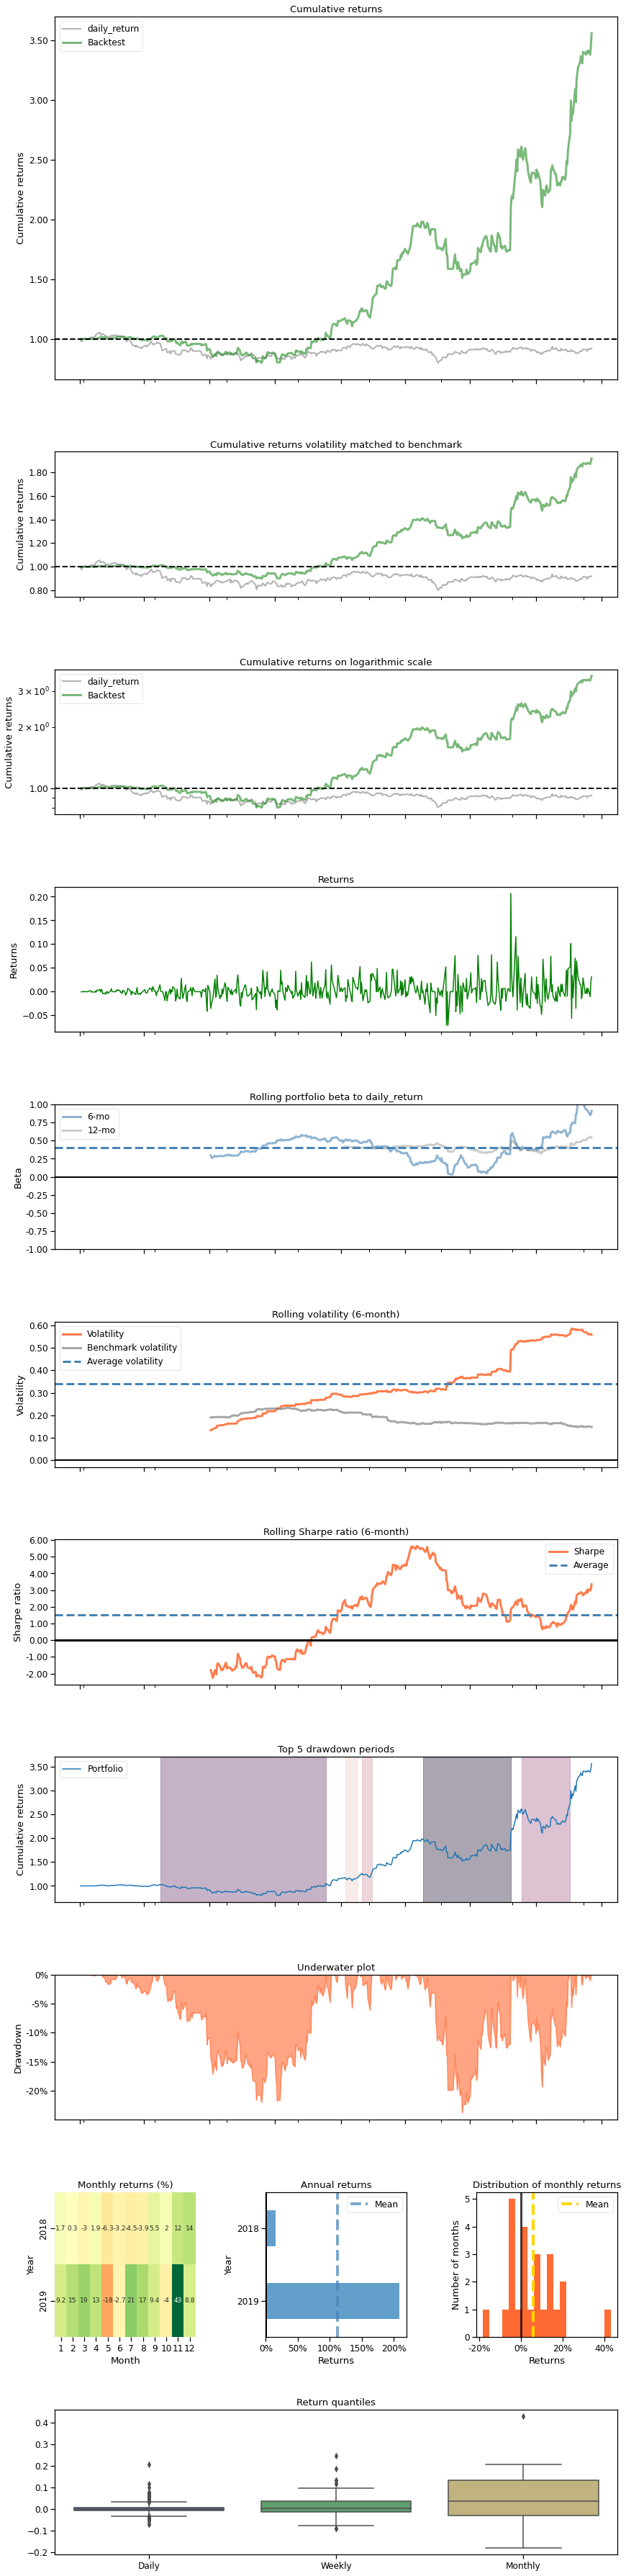

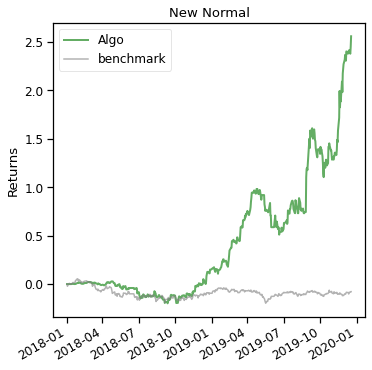

In [121]:
print("===========A2C Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_a2c, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_a2c.loc[0,'date'],
             baseline_end = df_account_value_a2c.loc[len(df_account_value_a2c)-1,'date'])

###8.2.2. Agen PPO

===========PPO Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (478, 8)


Start date,2018-01-02
End date,2019-12-18
Total months,23
,Backtest
Annual return,-4.09%
Cumulative returns,-7.876%
Annual volatility,11.012%
Sharpe ratio,-0.32
Calmar ratio,-0.33
Stability,0.03
Max drawdown,-12.387%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,12.39,2019-08-30,2019-11-27,NaT,NaN
1,9.71,2019-02-20,2019-05-17,2019-08-30,138
2,6.46,2018-02-09,2018-11-12,2019-01-03,235
3,2.36,2019-01-07,2019-01-09,2019-01-15,7
4,2.05,2019-01-15,2019-01-29,2019-01-31,13


Stress Events,mean,min,max
New Normal,-0.01%,-2.76%,2.95%


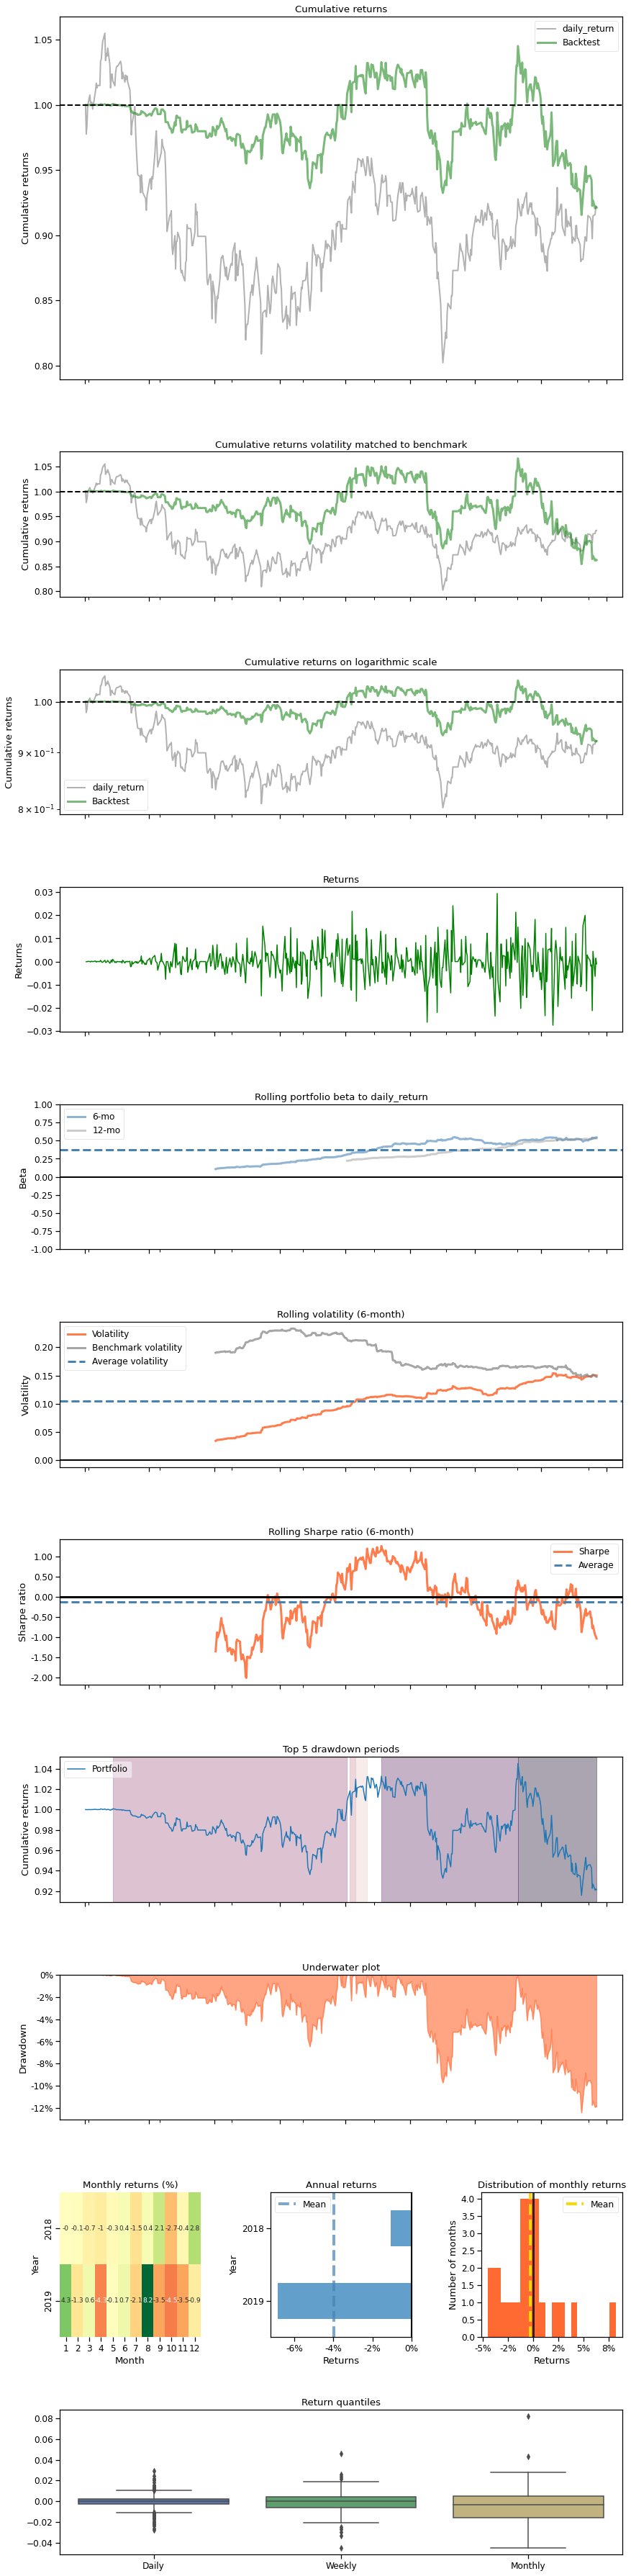

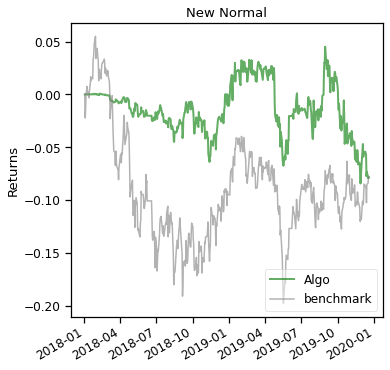

In [126]:
print("===========PPO Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_ppo, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_ppo.loc[0,'date'],
             baseline_end = df_account_value_ppo.loc[len(df_account_value_ppo)-1,'date'])

###8.2.3. Agen TD3

===========TD3 Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (478, 8)


Start date,2018-01-02
End date,2019-12-18
Total months,23
,Backtest
Annual return,-5.49%
Cumulative returns,-10.497%
Annual volatility,22.493%
Sharpe ratio,-0.14
Calmar ratio,-0.20
Stability,0.02
Max drawdown,-28.049%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,28.05,2018-02-09,2018-11-12,NaT,NaN
1,2.78,2018-01-29,2018-02-06,2018-02-09,10
2,1.15,2018-01-16,2018-01-18,2018-01-23,6
3,1.01,2018-01-25,2018-01-26,2018-01-29,3
4,0.82,2018-01-08,2018-01-09,2018-01-16,7


Stress Events,mean,min,max
New Normal,-0.01%,-5.03%,5.33%


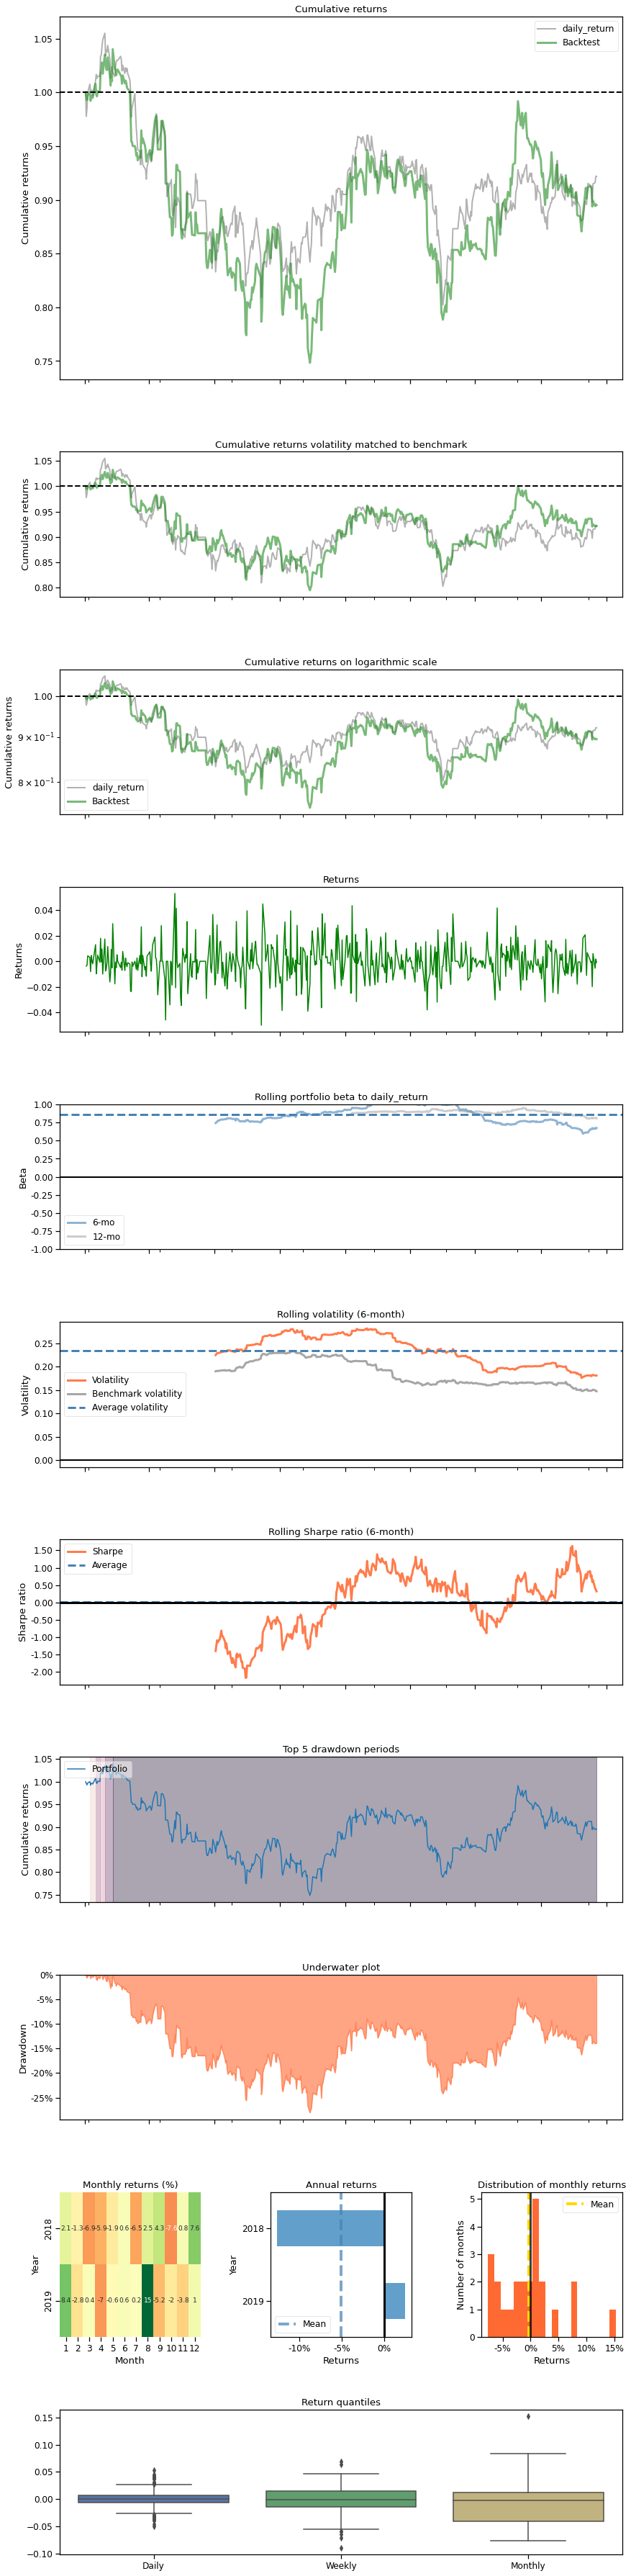

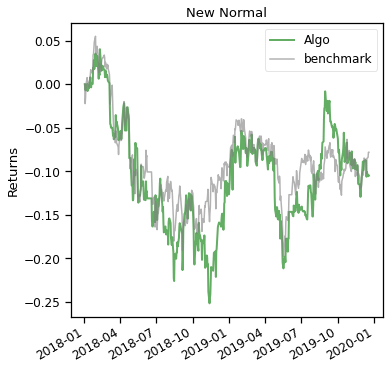

In [127]:
print("===========TD3 Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_td3, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_td3.loc[0,'date'],
             baseline_end = df_account_value_td3.loc[len(df_account_value_td3)-1,'date'])

###8.2.4. Agen SAC

============SAC Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (478, 8)


Start date,2018-01-02
End date,2019-12-18
Total months,23
,Backtest
Annual return,-1.659%
Cumulative returns,-3.232%
Annual volatility,22.492%
Sharpe ratio,0.04
Calmar ratio,-0.06
Stability,0.02
Max drawdown,-27.629%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,27.63,2018-02-09,2018-11-12,NaT,NaN
1,3.08,2018-01-29,2018-02-06,2018-02-09,10
2,1.22,2018-01-16,2018-01-18,2018-01-23,6
3,0.92,2018-01-08,2018-01-12,2018-01-16,7
4,0.89,2018-01-25,2018-01-26,2018-01-29,3


Stress Events,mean,min,max
New Normal,0.00%,-5.04%,5.22%


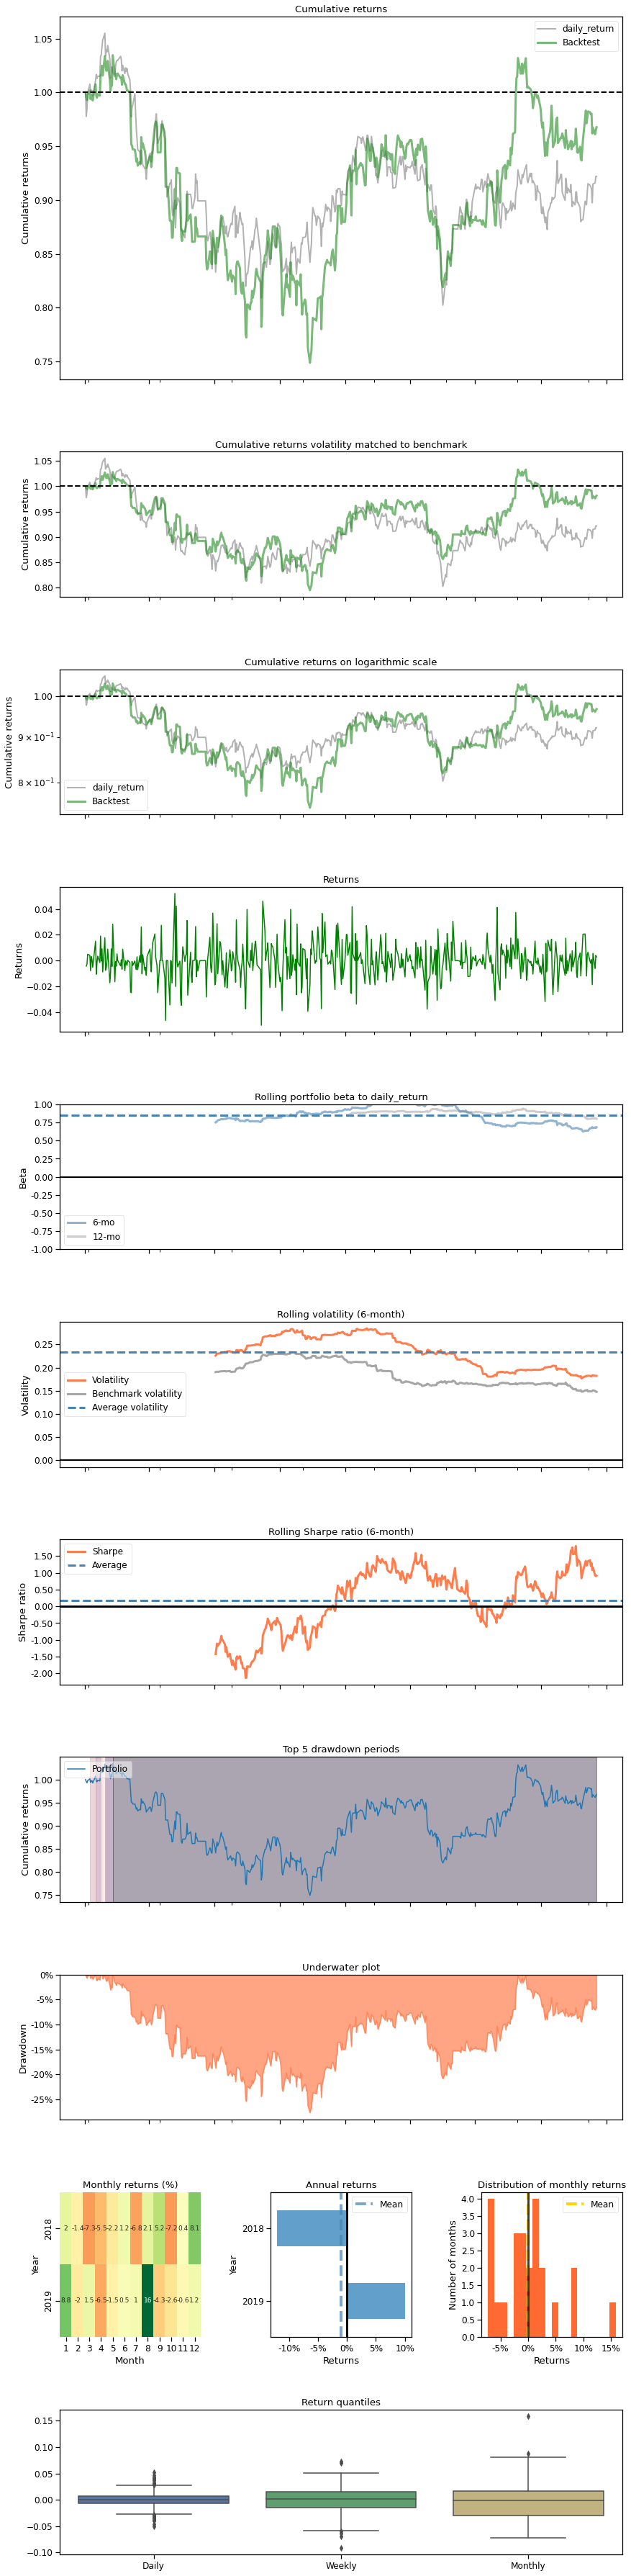

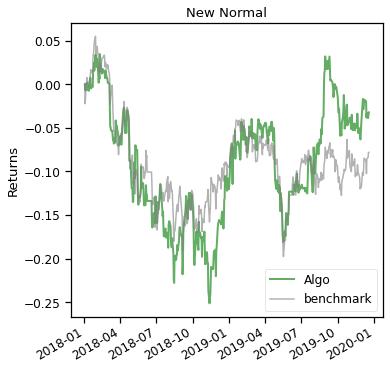

In [128]:
print("============SAC Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_sac, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_sac.loc[0,'date'],
             baseline_end = df_account_value_sac.loc[len(df_account_value_sac)-1,'date'])

###8.2.5. Agen DDPG

In [ ]:
print("===========DDPG Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_ddpg, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_ddpg.loc[0,'date'],
             baseline_end = df_account_value_ddpg.loc[len(df_account_value_ddpg)-1,'date'])